<a href="https://colab.research.google.com/github/solharsh/Data_Understanding_And_Preparation/blob/master/Lending_CLUB_with_NLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from google.colab import drive
drive.mount('/gdrive')
%cd /gdrive

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /gdrive
/gdrive


# 1. Importing Libraries

In [2]:
# Import our libraries we are going to use for our data analysis.
import tensorflow as tf
import pickle
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import pyplot as plt
import nltk
from nltk.corpus import wordnet
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from nltk.stem.wordnet import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import preprocessing
from sklearn.utils import class_weight


# For oversampling Library (Dealing with Imbalanced Datasets)
from imblearn.over_sampling import SMOTE
from collections import Counter

# Other Libraries
import time

% matplotlib inline
#NLP
import nltk
nltk.download('words')
nltk.download("stopwords") 
nltk.download('punkt')
nltk.download('wordnet')
# Importing the necessary functions
import nltk, re
from nltk.corpus import stopwords
stop = stopwords.words('english')
from nltk.stem import SnowballStemmer
from nltk.tokenize import word_tokenize
from nltk.corpus import wordnet
from nltk.stem import WordNetLemmatizer
words = set(nltk.corpus.words.words())
import string

#libraries for machine learning algorithms
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.svm import SVC
from sklearn_pandas import DataFrameMapper, CategoricalImputer
from sklearn.svm import LinearSVR
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
#importing necessary Decision Tree libraries
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
#importing necessary Random Forest Classifier library
from sklearn.ensemble import RandomForestClassifier
#importing necessary MLP library for Neural Network
from sklearn.neural_network import MLPClassifier
#importing necessary library for Naiye Bayes
from sklearn.naive_bayes import GaussianNB
#importing necessary library for LDA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
#importing necessary library for Gradient Boosting
from sklearn.ensemble import GradientBoostingClassifier
#importing necessary library for Support Vector Machines
from sklearn.svm import SVC
#importing necessary libraries for KNN classifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import f1_score


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Unzipping corpora/words.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


# 2. Importing the Data

In [0]:
start_df = pd.read_csv("/gdrive/My Drive/Capstone Project - NLP/fullacc.csv",low_memory=False)

Working on a copy of the dataframe so that I do not have to re-read the entire dataset again in order to save memory.

In [0]:
df = start_df.copy(deep=True)
df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,fico_range_low,fico_range_high,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,...,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_fico_range_low,sec_app_fico_range_high,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,hardship_flag,hardship_type,hardship_reason,hardship_status,deferral_term,hardship_amount,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
0,1077501,NaN,5000,5000,4975.0,36 months,0.1065,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,0.002765,0.0,Jan-85,735,739,1.0,NaN,NaN,3.0,0.0,13648,83.70%,9.0,f,0.0,0.0,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN
1,1077430,NaN,2500,2500,2500.0,60 months,0.1527,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,0.000100,0.0,Apr-99,740,744,5.0,NaN,NaN,3.0,0.0,1687,9.40%,4.0,f,0.0,0.0,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN
2,1077175,NaN,2400,2400,2400.0,36 months,0.1596,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,small_business,real estate business,606xx,IL,0.000872,0.0,Nov-01,735,739,2.0,NaN,NaN,2.0,0.0,2956,98.50%,10.0,f,0.0,0.0,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN
3,1076863,NaN,10000,10000,10000.0,36 months,0.1349,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,0.002000,0.0,Feb-96,690,694,1.0,35.0,NaN,10.0,0.0,5598,21%,37.0,f,0.0,0.0,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN
4,1075358,NaN,3000,3000,3000.0,60 months,0.1269,67.79,B,B5,University Medical Group,1 year,RENT,80000.0,Source Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/21/11 > I plan on combi...,other,Personal,972xx,OR,0.001794,0.0,Jan-96,695,699,0.0,38.0,NaN,15.0,0.0,27783,53.90%,38.0,f,0.0,0.0,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN


In [0]:
print('There are {} rows and {} columns in the dataset.'.format(df.shape[0],df.shape[1]))

There are 334262 rows and 150 columns in the dataset.


In [0]:
#printing the name of columns
df.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       ...
       'orig_projected_additional_accrued_interest',
       'hardship_payoff_balance_amount', 'hardship_last_payment_amount',
       'debt_settlement_flag', 'debt_settlement_flag_date',
       'settlement_status', 'settlement_date', 'settlement_amount',
       'settlement_percentage', 'settlement_term'],
      dtype='object', length=150)

# 3. Exploratory data analysis and missing value imputation

In [0]:
# This will print basic statistics for numerical columns
df.describe()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,delinq_2yrs,fico_range_low,fico_range_high,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,last_fico_range_high,last_fico_range_low,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,annual_inc_joint,dti_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,...,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_fico_range_low,sec_app_fico_range_high,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,deferral_term,hardship_amount,hardship_length,hardship_dpd,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,settlement_amount,settlement_percentage,settlement_term
count,3.342620e+05,0.0,334262.000000,334262.000000,334262.000000,334262.00000,334262.000000,3.342580e+05,334234.000000,334233.000000,334262.000000,334262.000000,334233.000000,151989.000000,42205.000000,334233.000000,334233.000000,3.342620e+05,334233.000000,334262.000000,334262.000000,334262.000000,334262.000000,334262.000000,334262.000000,334262.000000,334262.000000,334262.000000,334262.000000,334262.000000,334262.000000,334117.000000,63181.000000,334262.0,4.136000e+03,4136.000000,334233.000000,263986.000000,2.639860e+05,103546.000000,...,263986.000000,263986.000000,263986.000000,263986.000000,275672.000000,258092.000000,263986.000000,263986.000000,263986.000000,263833.000000,281351.000000,332897.000000,334157.000000,2.639860e+05,2.842320e+05,284232.000000,2.639860e+05,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1189.0,1189.000000,1189.0,1189.000000,924.000000,1189.000000,1189.000000,4980.000000,4980.000000,4980.000000
mean,3.164503e+07,NaN,13875.948283,13840.409320,13744.993511,0.13816,425.222429,7.447377e+04,0.001712,0.267212,698.371981,702.372070,0.762953,34.494523,74.883213,11.015507,0.150895,1.607664e+04,24.062056,529.126631,528.995478,14944.843258,14845.579036,11787.303418,2974.938506,1.598782,181.002558,24.858432,3968.100194,682.480058,668.680496,0.008548,42.982352,1.0,1.139798e+05,18.034579,0.003530,154.674051,1.402929e+05,1.003206,...,8.079269,8.105384,14.432068,5.627988,11.307619,0.000678,0.002871,0.076731,1.930095,94.574750,49.559745,0.100112,0.031931,1.714015e+05,4.661599e+04,20963.748185,3.904553e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,158.134113,3.0,13.714045,454.083247,11501.755517,181.890538,4632.592337,47.011159,10.858233
std,4.114463e+07,NaN,8456.075067,8437.598651,8465.548267,0.04575,253.955017,6.245915e+04,0.000909,0.775058,31.676947,31.677364,1.073888,21.782080,29.755241,5.035588,0.497684,2.075735e+04,11.432065,2320.875181,2320.584334,10351.531723,10367.476867,8216.350661,3224.871279,11.935766,838.080795,141.214422,5941.951128,79.300176,120.989880,0.103159,21.338562,0.0,5.359257e+04,6.830180,0.065177,2162.366510,1.563619e+05,1.181623,...,6.967748,4.235378,7.637122,3.068014,5.082346,0.026909,0.057336,0.453984,1.687814,8.404424,35.394278,0.323046,0.312322,1.753001e+05,4.505938e+04,20121.399271,4.146716e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,132.157596,0.0,9.710402,374.560643,7764.558706,196.320385,3495.971759,7.844463,8.918410
min,5.473400e+04,NaN,500.000000,500.000000,0.000000,0.05320,4.930000,0.000000e+00,0.000000,0.000000,610.000000,614.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,1.000000,

So, we've got a lot of columns that we need to understand. Knowing what the columns mean can help us a lot for better results.

In [0]:
#Removing all other predictors and their associated predictor columns containing amount related data other than loan amount which we will be using for modelling
df.drop(['funded_amnt','funded_amnt_inv','last_pymnt_amnt','delinq_amnt'],axis=1,inplace=True)

In [0]:
#removing grade, sub grade and interest columns
df.drop(['grade','sub_grade','int_rate'],axis=1,inplace=True)

Printing the Data Dictionary to refer and understand the data better

In [0]:
df_description = pd.read_excel(r'/gdrive/My Drive/Capstone Project - NLP/Harsh/LCDataDictionary.xlsx').dropna()
print(df_description.shape[0])
df_description.style.set_properties(subset=['Description'], **{'width': '1000px'})

151


,LoanStatNew,Description
0,acc_now_delinq,The number of accounts on which the borrower is now delinquent.
1,acc_open_past_24mths,Number of trades opened in past 24 months.
2,addr_state,The state provided by the borrower in the loan application
3,all_util,Balance to credit limit on all trades
4,annual_inc,The self-reported annual income provided by the borrower during registration.
5,annual_inc_joint,The combined self-reported annual income provided by the co-borrowers during registration
6,application_type,Indicates whether the loan is an individual application or a joint application with two co-borrowers
7,avg_cur_bal,Average current balance of all accounts
8,bc_open_to_buy,Total open to buy on revolving bankcards.
9,bc_util,Ratio of total current balance to high credit/credit limit for all bankcard accounts.


From the dictionary and head of the dataset, we can see that some columns like annual_inc, funded_amt, etc. may be much useful for building our model but at the same time, some columns like id, member_id, etc. will not be helping.

Also, I will drop the column 'issue_d' which denotes the date the loan was funded since it does not convey any information about the borrower

In [0]:
drop_list = ['id','member_id','issue_d']
df = df.drop(drop_list,axis=1)

In [0]:
df['emp_title'].value_counts()

Teacher                                     2705
Manager                                     2385
Owner                                       1311
Registered Nurse                            1176
RN                                          1163
                                            ... 
Texas Health Harris Methodist Southwest        1
Brooklyn Cardiology, PC                        1
engineer/conductor                             1
LUTHER MANKATO HONDA                           1
Alexis Hair Products                           1
Name: emp_title, Length: 170688, dtype: int64

In [0]:
#Dropping another column that I deem unnecessary. It contains data in an unorganized way which will not be very helpful for modeling. 
drop_list2 = ['emp_title']
df = df.drop(drop_list2,axis=1)

In [0]:
df.head(1)

,loan_amnt,term,installment,emp_length,home_ownership,annual_inc,verification_status,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,fico_range_low,fico_range_high,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,next_pymnt_d,...,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_fico_range_low,sec_app_fico_range_high,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,hardship_flag,hardship_type,hardship_reason,hardship_status,deferral_term,hardship_amount,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
0,5000,36 months,162.87,10+ years,RENT,24000.0,Verified,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,0.002765,0.0,Jan-85,735,739,1.0,NaN,NaN,3.0,0.0,13648,83.70%,9.0,f,0.0,0.0,5863.155187,5833.84,5000.0,863.16,0.0,0.0,0.0,Jan-15,NaN,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN


In [0]:
#Url is also not much of importance to us. Dropping it. 
drop_list3 = ['url']
df = df.drop(drop_list3,axis=1)

In [0]:
#leaving description field as I will be trying to apply NLP techniques on it for feature engineering. 

In [0]:
#exploring what is there in purpose predictor
df['purpose'].unique()

array(['credit_card', 'car', 'small_business', 'other', 'wedding',
       'debt_consolidation', 'home_improvement', 'major_purchase',
       'medical', 'moving', 'vacation', 'house', 'renewable_energy',
       'educational'], dtype=object)

As we can see there are values like credit card, debt_consolidation etc which conveys more of less similar information (debt). Therefore, reducing it by recoding similar attributes to a standard value. 

In [0]:
# recode loan purpose 
df['purpose_n'] = np.nan #Creating new column and filling it with nan values

#filter by debt consolidation, CC and storing them in new columns with a common name "DEBT"
df.loc[(df['purpose'] == 'debt_consolidation')|(df['purpose'] =="credit_card"), 'purpose_n'] = 'debt' 
#filter by home improvement, major purchase, car, house, vacation, renewable energy 
#and storing them in new columns with a common name "major purchases"
df.loc[(df['purpose'] == 'home_improvement')|(df['purpose'] =="major_purchase")|
                 (df['purpose'] == 'car')|(df['purpose'] =="house")|
                 (df['purpose'] == 'vacation')|(df['purpose'] =="renewable_energy"),
                 'purpose_n'] = 'major_purchases' 
#filter by small business, medical, moving, wedding, educational 
#and storing them in new columns with a common name "life events"                 
df.loc[(df['purpose'] == 'small_business')|(df['purpose'] =="medical")|
                 (df['purpose'] == 'moving')|(df['purpose'] =="wedding")|
                 (df['purpose'] == 'educational'),
                 'purpose_n'] = 'life_events'
#the remaining category will remain with the same name 'other' in new columns                 
df.loc[(df['purpose'] == 'other'), 'purpose_n'] = 'other'

In [0]:
df['title'].unique()#.tolist()
#There are too many unique values to get a meaning out of it. Also, it contains more or less similar information as Purpose predictor which is much cleaner. So, we will drop the title field.

array(['Computer', 'bike', 'real estate business', ..., 'takeitaway',
       'Creditt Card Loan', 'debt reduction/hone updates'], dtype=object)

In [0]:
#As we have created a new column after recoding the values under purpose, dropping the original purpose predictor. 
#Also, the title predictor contains too many unique values and is more or less similar to purpose predictor which we recoded above
drop_list4 = ['purpose','title']
df = df.drop(drop_list4,axis=1)

In [0]:
print(df['zip_code'].head())
print(df['addr_state'].value_counts().head(5))

0    860xx
1    309xx
2    606xx
3    917xx
4    972xx
Name: zip_code, dtype: object
CA    51778
NY    28589
TX    26350
FL    23733
IL    13269
Name: addr_state, dtype: int64


In [0]:
#Zip code and State contains similar information. Also, zip code does not even have the entire zip code value and just 3 digits. So, dropping it and keeping state. 
drop_list5 = ['zip_code']
df = df.drop(drop_list5,axis=1)

dti: A ratio calculated using the borrower’s total monthly debt payments on the total debt obligations, excluding mortgage and the requested LC loan, divided by the borrower’s self-reported monthly income. 

Looks important to me. Keeping it. 

- delinq_2yrs: The number of 30+ days past-due incidences of delinquency in the borrower’s credit file for the past 2 years
I am not sure what delinquency is. Let's google it. 

- delinquency:neglect of one's duty.
minor crime, especially that committed by young people.

Again, looks important as it clearly states individual's chances of being a defaulter. 

In [0]:
df.earliest_cr_line.head(3)

0    Jan-85
1    Apr-99
2    Nov-01
Name: earliest_cr_line, dtype: object

The column 'earliest_cr_line' describes the date when the first credit line was established. Usually, the longer one has held a credit line, the more desirable as a borrower. This feature will therefore be more useful if converted to a measure of how long one has held a credit line. To do this, I will convert the column from object to datetime and calculate the time duration from the establishment of the first credit line to the current date.

In [0]:
import datetime

# calculate time since first credit line
now = datetime.datetime.today() #prints current date
def credit_age (x):
    if x != 'nan': #filter non null
        c1 = datetime.datetime.strptime(x, '%b-%y') #strips the present date in mon-year format 
        #b-Abbreviated month name.	y-Year without century as a zero-padded decimal number.	#Reference: https://www.programiz.com/python-programming/datetime/strftime
        return (now-c1).days/365.25
        #return c1
    else:
        return None

df['earliest_cr_line_n'] = df['earliest_cr_line'].astype(str)
df['earliest_cr_line_n'] = df['earliest_cr_line_n'].apply(credit_age)


In [0]:
df['earliest_cr_line_n'].head()

0    35.329227
1    21.084189
2    18.496920
3    24.246407
4    24.331280
Name: earliest_cr_line_n, dtype: float64

In [0]:
#Removing the original columns "earliest_6cr_line" because we have transformed it to a new one
drop_list6 = ['earliest_cr_line']
df = df.drop(drop_list6,axis=1)

Checking the count of missing values and percentage

In [0]:
def null_values(df): #creates a function with below logic
        mis_val = df.isnull().sum() #gives sum of missing values (null values)
        mis_val_percent = 100 * df.isnull().sum() / len(df) #getting percentage of missing values
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1) #creating a DF containing missing value count and it's percentage
        mis_val_table_ren_columns = mis_val_table.rename( 
        columns = {0 : 'Missing Values', 1 : '% of Total Values'}) #renaming the columns
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1) #getting the percentage of missing values in descending order and rounding it to 1 decimal
        print ("Dataframe has " + str(df.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.") #printing number of columns and missing value count
        return mis_val_table_ren_columns

In [0]:
# Missing values statistics
miss_values = null_values(df)
miss_values.head(20)

Dataframe has 136 columns.
There are 108 columns that have missing values.


,Missing Values,% of Total Values
sec_app_mort_acc,334262,100.0
sec_app_num_rev_accts,334262,100.0
sec_app_chargeoff_within_12_mths,334262,100.0
sec_app_collections_12_mths_ex_med,334262,100.0
sec_app_open_act_il,334262,100.0
sec_app_mths_since_last_major_derog,334262,100.0
sec_app_revol_util,334262,100.0
sec_app_open_acc,334262,100.0
revol_bal_joint,334262,100.0
sec_app_fico_range_low,334262,100.0


We can see many columns are either empty or have very less data compared to the features to be used. 
For example, member_id, revol_bal_joint, sec_app_fico_range_low, sec_app_fico_range_high and so on. 

Therefore, those can be removed upfront. So, I am assuming that predictors that contain more than 70% missing values are not useful and removing them.

### 3.1 Drop features missing more than 30% data

In [0]:
#First calculate the percentage of missing data for each feature:
missing_features = df.isnull().mean().sort_values(ascending=False)

Text(0, 0.5, 'Feature count')

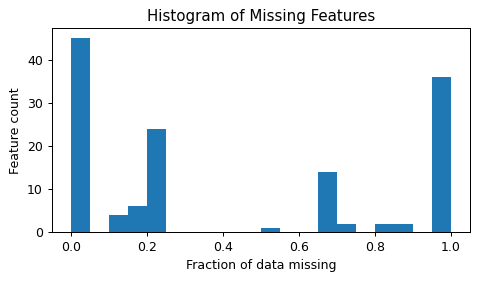

In [0]:
#Let's visualize the distribution of missing data percentages:
plt.figure(figsize=(6,3), dpi=90)
missing_features.plot.hist(bins=20)
plt.title('Histogram of Missing Features')
plt.xlabel('Fraction of data missing')
plt.ylabel('Feature count')

From the above histogram, we see there's a large gap between features missing "some" data (<25%) and those missing "lots" of data (>40%). 

Assuming that it will be very difficult to accurately impute data with more than 30% missing values, dropping such columns. Let's create a list of all columns missing more than 30% data in an alphabetical list:

In [0]:
drop_list = sorted(list(missing_features[missing_features > 0.3].index)) #creating list to store the column names with over 30% missing values
print(drop_list)

['all_util', 'annual_inc_joint', 'debt_settlement_flag_date', 'deferral_term', 'desc', 'dti_joint', 'hardship_amount', 'hardship_dpd', 'hardship_end_date', 'hardship_last_payment_amount', 'hardship_length', 'hardship_loan_status', 'hardship_payoff_balance_amount', 'hardship_reason', 'hardship_start_date', 'hardship_status', 'hardship_type', 'il_util', 'inq_fi', 'inq_last_12m', 'max_bal_bc', 'mths_since_last_delinq', 'mths_since_last_major_derog', 'mths_since_last_record', 'mths_since_rcnt_il', 'mths_since_recent_bc_dlq', 'mths_since_recent_revol_delinq', 'next_pymnt_d', 'open_acc_6m', 'open_act_il', 'open_il_12m', 'open_il_24m', 'open_rv_12m', 'open_rv_24m', 'orig_projected_additional_accrued_interest', 'payment_plan_start_date', 'revol_bal_joint', 'sec_app_chargeoff_within_12_mths', 'sec_app_collections_12_mths_ex_med', 'sec_app_earliest_cr_line', 'sec_app_fico_range_high', 'sec_app_fico_range_low', 'sec_app_inq_last_6mths', 'sec_app_mort_acc', 'sec_app_mths_since_last_major_derog', '

In [0]:
#number of features to be dropped?
len(drop_list)

57

In [0]:
#Dropping these features
df.drop(drop_list, axis=1, inplace=True)

In [0]:
print('Now we are left with {} columns'.format(df.shape[1]))
print('The remaining columns are as follows:')
print(df.columns)

Now we are left with 79 columns
The remaining columns are as follows:
Index(['loan_amnt', 'term', 'installment', 'emp_length', 'home_ownership',
       'annual_inc', 'verification_status', 'loan_status', 'pymnt_plan',
       'addr_state', 'dti', 'delinq_2yrs', 'fico_range_low', 'fico_range_high',
       'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util',
       'total_acc', 'initial_list_status', 'out_prncp', 'out_prncp_inv',
       'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_d', 'last_credit_pull_d', 'last_fico_range_high',
       'last_fico_range_low', 'collections_12_mths_ex_med', 'policy_code',
       'application_type', 'acc_now_delinq', 'tot_coll_amt', 'tot_cur_bal',
       'total_rev_hi_lim', 'acc_open_past_24mths', 'avg_cur_bal',
       'bc_open_to_buy', 'bc_util', 'chargeoff_within_12_mths',
       'mo_sin_old_il_acct', 'mo_sin_old_rev_tl_op', 'mo_

In [0]:
df.head(1)

,loan_amnt,term,installment,emp_length,home_ownership,annual_inc,verification_status,loan_status,pymnt_plan,addr_state,dti,delinq_2yrs,fico_range_low,fico_range_high,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_credit_pull_d,last_fico_range_high,last_fico_range_low,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_inq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,hardship_flag,debt_settlement_flag,purpose_n,earliest_cr_line_n
0,5000,36 months,162.87,10+ years,RENT,24000.0,Verified,Fully Paid,n,AZ,0.002765,0.0,735,739,1.0,3.0,0.0,13648,83.70%,9.0,f,0.0,0.0,5863.155187,5833.84,5000.0,863.16,0.0,0.0,0.0,Jan-15,May-19,714,710,0.0,1,Individual,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,N,N,debt,35.329227


That's great. We have considerably reduced the features from 136 to 79. 

In [0]:
print(df['pymnt_plan'].unique())
print(df['pymnt_plan'].value_counts())

['n' 'y']
n    334232
y        30
Name: pymnt_plan, dtype: int64


In [0]:
#As there are mostly 'no' values and very few number of 'yes' values. Dropping it. 
drop_list7 = ['pymnt_plan']
df = df.drop(drop_list7,axis=1)

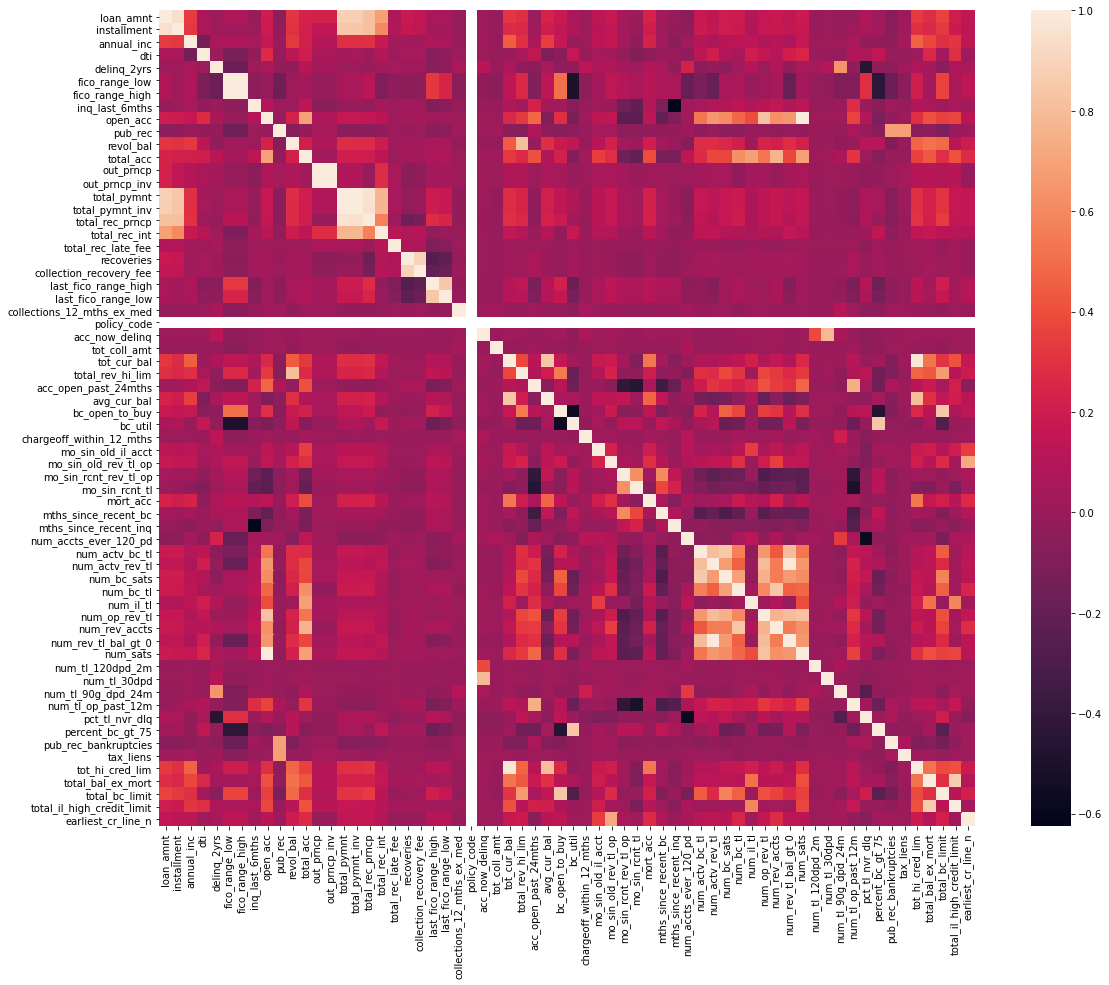

In [0]:
cor = df.corr() #Checking corelation between features
plt.subplots(figsize=(20,15)) #giving figure size parameters
sns.heatmap(cor, square = True) #plotting heatmap to check corelation

From the above heatmap we can observe that there is a high correlation between quite a few variables. For example: 
1. fico_range_high and fico_range_low
2. last_fico_range_high and last_fico_range_low

Therefore, instead of keeping both. I am taking average of such values to eliminate one columns and reduce multicollinearity. 



In [0]:
# calcualte mean fico score
df['fico_avg'] = (df['fico_range_high'] + df['fico_range_low'])/2
# calcualte mean last_fico score
df['last_fico_avf'] = (df['last_fico_range_high'] + df['last_fico_range_low'])/2
#Dropping the columns that are now transformed to new columns
drop_list8 = ['fico_range_high','last_fico_range_high','last_fico_range_low','last_fico_range_high']
df = df.drop(drop_list8,axis=1)

In [0]:
#Opps. I missed one column. 
df = df.drop(['fico_range_low'],axis=1)

In [0]:
df.head(1)

,loan_amnt,term,installment,emp_length,home_ownership,annual_inc,verification_status,loan_status,addr_state,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_inq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,hardship_flag,debt_settlement_flag,purpose_n,earliest_cr_line_n,fico_avg,last_fico_avf
0,5000,36 months,162.87,10+ years,RENT,24000.0,Verified,Fully Paid,AZ,0.002765,0.0,1.0,3.0,0.0,13648,83.70%,9.0,f,0.0,0.0,5863.155187,5833.84,5000.0,863.16,0.0,0.0,0.0,Jan-15,May-19,0.0,1,Individual,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,N,N,debt,35.329227,737.0,712.0


#Seeing next 5 columns:

- inq_last_6mths:
The number of inquiries in past 6 months (excluding auto and mortgage inquiries)

- mths_since_last_delinq: 
The number of months since the borrower's last delinquency.

- open_acc:
The number of open credit lines in the borrower’s credit file.

- pub_rec: Number of derogatory public records

- revol_bal : Total credit revolving balance





In [0]:
df['open_acc'].head()

0     3.0
1     3.0
2     2.0
3    10.0
4    15.0
Name: open_acc, dtype: float64

Can't be very sure. But, by definition, all of these seems important. So, for now, I am letting it be. 

Let's proceed and contninue to improve financial jargon vocabulary even more. 

- revol_util	- 
Revolving line utilization rate, or the amount of credit the borrower is using relative to all available revolving credit. In simpler terms, the credit card debt to limit ratio as a percentage. (seems important) (however, need further clearning)

- total_acc - The total number of credit lines currently in the borrower’s credit file (seems important)

- initial_list_status - The initial listing status of the loan. Possible values are – W, F (not able to find what W, F means) (Not sure) (need to see separately)

- out_prncp	: Remaining outstanding principal for total amount funded

- out_prncp_inv	: Remaining outstanding principal for portion of total amount funded by investors

- total_pymnt	: Payments received to date for total amount funded

- total_pymnt_inv	: Payments received to date for portion of total amount funded by investors

- total_rec_prncp	: Principal received to date

- total_rec_int	: Interest received to date

- total_rec_late_fee	: Late fees received to date

- recoveries	: post charge off gross recovery

- collection_recovery_fee	: post charge off collection fee

- last_pymnt_d : Last month payment was received

We need to drop the following columns as they contain information that will not be present while applying for a loan. Meaning, all of them contains data from the future which will not be present at the initial state for the unseen data (people applying for loan)

- out_prncp
- out_prncp_inv
- total_pymnt
- total_pymnt_inv
- total_rec_prncp
- total_rec_int
- total_rec_late_fee
- recoveries
- collection_recovery_fee
- last_pymnt_d
- last_pymnt_amnt
- last_credit_pull_d




I'm using my best available knowledge after going through the dictionary and few google pages to determine which loan features are known to potential investors. I am not an investor, so my knowledge loan process is not too great. 

In [0]:
DROP_LIST = ['funded_amnt', 'funded_amnt_inv', 'pymnt_plan', 'delinq_2yrs', 'inq_last_6mths', 'out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries', 'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt', 'last_credit_pull_d', 'last_fico_range_high', 'last_fico_range_low', 'collections_12_mths_ex_med', 'policy_code', 'acc_now_delinq', 'tot_coll_amt', 'tot_cur_bal', 'total_rev_hi_lim', 'acc_open_past_24mths', 'avg_cur_bal', 'bc_open_to_buy', 'bc_util', 'chargeoff_within_12_mths', 'delinq_amnt', 'mo_sin_old_il_acct', 'mo_sin_old_rev_tl_op', 'mo_sin_rcnt_rev_tl_op', 'mo_sin_rcnt_tl', 'mths_since_recent_bc', 'mths_since_recent_inq', 'num_accts_ever_120_pd', 'num_actv_bc_tl', 'num_actv_rev_tl', 'num_bc_sats', 'num_bc_tl', 'num_il_tl', 'num_op_rev_tl', 'num_rev_accts', 'num_rev_tl_bal_gt_0', 'num_sats', 'num_tl_120dpd_2m', 'num_tl_30dpd', 'num_tl_90g_dpd_24m', 'num_tl_op_past_12m', 'pct_tl_nvr_dlq', 'percent_bc_gt_75', 'tax_liens', 'tot_hi_cred_lim', 'total_bal_ex_mort', 'total_bc_limit', 'total_il_high_credit_limit', 'hardship_flag', 'disbursement_method', 'debt_settlement_flag']

In [0]:
drop_list9 = ['out_prncp','out_prncp_inv','total_pymnt','total_pymnt_inv','total_rec_prncp','total_rec_int',
        'total_rec_late_fee','recoveries','collection_recovery_fee','last_pymnt_d',
        'last_credit_pull_d']
df = df.drop(drop_list9,axis=1)

In [0]:
drop_list10 = ['inq_last_6mths']
df = df.drop(drop_list10,axis=1)

In [0]:
df.head(1)

,loan_amnt,term,installment,emp_length,home_ownership,annual_inc,verification_status,loan_status,addr_state,dti,delinq_2yrs,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_inq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,hardship_flag,debt_settlement_flag,purpose_n,earliest_cr_line_n,fico_avg,last_fico_avf
0,5000,36 months,162.87,10+ years,RENT,24000.0,Verified,Fully Paid,AZ,0.002765,0.0,3.0,0.0,13648,83.70%,9.0,f,0.0,1,Individual,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,N,N,debt,35.329227,737.0,712.0


- initial_list_status	: The initial listing status of the loan. Possible values are – W, F (not sure what W, F means)
- collections_12_mths_ex_med	: Number of collections in 12 months excluding medical collections (need to see further)
- policy_code	: publicly available policy_code=1\nnew products not publicly available policy_code=2
- application_type	: Indicates whether the loan is an individual application or a joint application with two co-borrowers
- acc_now_delinq : The number of accounts on which the borrower is now delinquent.


In [0]:
print(df['initial_list_status'].head(3))
print(df['initial_list_status'].unique())
print(df['initial_list_status'].count())

0    f
1    f
2    f
Name: initial_list_status, dtype: object
['f' 'w']
334262


initital_list_status: "The initial listing status of the loan. Possible values are – W, F." I'm not sure what this means.

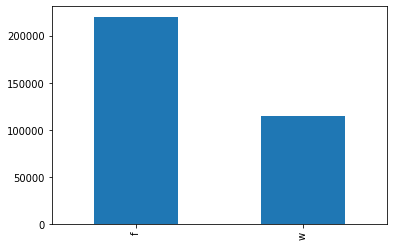

In [0]:
df['initial_list_status'].value_counts().plot.bar()
plt.show()

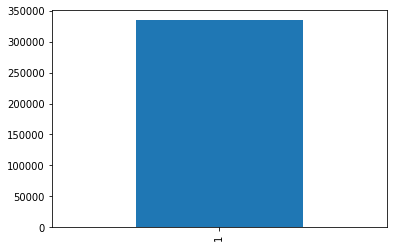

In [0]:
df['policy_code'].value_counts().plot.bar()
plt.show()

In [0]:
print(df.policy_code.value_counts())
print(df.initial_list_status.value_counts())

1    334262
Name: policy_code, dtype: int64
f    220101
w    114161
Name: initial_list_status, dtype: int64


The columns 'policy_code' has only one class and do not provide any information that would be useful in building a predictive model. Removing it!

In [0]:
drop_list11 =['policy_code']
df = df.drop(drop_list11,axis=1)

In [0]:
df['collections_12_mths_ex_med'].value_counts()

0.0    331494
1.0      2449
2.0       147
3.0        13
4.0         6
5.0         4
7.0         1
6.0         1
8.0         1
9.0         1
Name: collections_12_mths_ex_med, dtype: int64

'collections_12_mths_ex_med' has almost all values as 0 and will therefore not be very useful for modeling. Removing it.

In [0]:
df = df.drop(['collections_12_mths_ex_med'],axis=1)

In [0]:
df['application_type'].value_counts()

Individual    330126
Joint App       4136
Name: application_type, dtype: int64

It has very few data points for joint application. So, Let's just compare the charge-off rates by application type:

In [0]:
df.groupby('application_type')['loan_status'].value_counts(normalize=True).loc[:,'Charged Off']

application_type
Individual    0.151051
Joint App     0.138781
Name: loan_status, dtype: float64

Joint loans are slightly less likely to be charged-off. So, it is important. Keeping it. 

In [0]:
df['acc_now_delinq'].value_counts()

0.0    333138
1.0      1032
2.0        51
3.0         6
4.0         3
5.0         2
6.0         1
Name: acc_now_delinq, dtype: int64

In [0]:
df['acc_now_delinq'].isna().sum()

29

In [0]:
#Not many missing values and majority of the class contains 0. So, imputing with 0.
df['acc_now_delinq'] = df['acc_now_delinq'].fillna(0)

In [0]:
df.head(1)

,loan_amnt,term,installment,emp_length,home_ownership,annual_inc,verification_status,loan_status,addr_state,dti,delinq_2yrs,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_inq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,hardship_flag,debt_settlement_flag,purpose_n,earliest_cr_line_n,fico_avg,last_fico_avf
0,5000,36 months,162.87,10+ years,RENT,24000.0,Verified,Fully Paid,AZ,0.002765,0.0,3.0,0.0,13648,83.70%,9.0,f,Individual,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,N,N,debt,35.329227,737.0,712.0


- tot_coll_amt	: Total collection amounts ever owed (Seems important as how much was owed can definitely tell if a person is likely to default or not)
- tot_cur_bal	: Total current balance of all accounts (how much a person keeps in his account surely can be a predictor to tell if he will default or not) (Trust me on this, I have and obviously, I am close to nil almost all the time)

Below 4 are more or less related to open_acc (The number of open credit lines in the borrower's credit file).Therefore, removing them. 
- open_acc_6m :	Number of open trades in last 6 months
- open_il_12m	: Number of installment accounts opened in past 12 months
- open_il_24m	: Number of installment accounts opened in past 24 months
- open_act_il	: Number of currently active installment trades

In [0]:
#drop_list12 = ['open_acc_6m','open_il_12m','open_il_24m','open_act_il']
#df = df.drop(drop_list12,axis=1)

In [0]:
print(df['tot_coll_amt'].value_counts())
print(df['tot_coll_amt'].describe())
print(df['tot_cur_bal'].value_counts())
print(df['tot_cur_bal'].describe())

0.0        231490
50.0          498
100.0         390
75.0          319
60.0          223
            ...  
5151.0          1
12638.0         1
10809.0         1
1912.0          1
4095.0          1
Name: tot_coll_amt, Length: 5010, dtype: int64
count    263986.000000
mean        154.674051
std        2162.366510
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max      848438.000000
Name: tot_coll_amt, dtype: float64
0.0          44
22396.0      13
13721.0      11
19830.0      11
14163.0      11
             ..
3254633.0     1
50854.0       1
406833.0      1
406839.0      1
379567.0      1
Name: tot_cur_bal, Length: 170518, dtype: int64
count    2.639860e+05
mean     1.402929e+05
std      1.563619e+05
min      0.000000e+00
25%      2.842000e+04
50%      8.097800e+04
75%      2.107005e+05
max      8.000078e+06
Name: tot_cur_bal, dtype: float64


In [0]:
#As majority of the class contains 0. So, imputing with 0.
df['tot_coll_amt'] = df['tot_coll_amt'].fillna(0)
df['tot_cur_bal'] = df['tot_cur_bal'].fillna(0)

In [0]:
df.head(1)

,loan_amnt,term,installment,emp_length,home_ownership,annual_inc,verification_status,loan_status,addr_state,dti,delinq_2yrs,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_inq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,hardship_flag,debt_settlement_flag,purpose_n,earliest_cr_line_n,fico_avg,last_fico_avf
0,5000,36 months,162.87,10+ years,RENT,24000.0,Verified,Fully Paid,AZ,0.002765,0.0,3.0,0.0,13648,83.70%,9.0,f,Individual,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,N,N,debt,35.329227,737.0,712.0


- mths_since_rcnt_il	: Months since most recent installment accounts opened
- total_bal_il :Total current balance of all installment accounts	 
- open_rv_12m	: Number of revolving trades opened in past 12 months
- open_rv_24m :	Number of revolving trades opened in past 24 months
- max_bal_bc : Maximum current balance owed on all revolving accounts	
- all_util : Balance to credit limit on all trades	
- total_rev_hi_lim : Total revolving high credit/credit limit	
- inq_fi : Number of personal finance inquiries	
- total_cu_tl : Number of finance trades

In [0]:
def check_stats(col):
  print(df[col].head())
  print(df[col].describe())
  print(df[col].value_counts())

In [0]:
check_stats('total_rev_hi_lim')

0   NaN
1   NaN
2   NaN
3   NaN
4   NaN
Name: total_rev_hi_lim, dtype: float64
count    2.639860e+05
mean     3.127535e+04
std      3.642529e+04
min      0.000000e+00
25%      1.400000e+04
50%      2.350000e+04
75%      3.870850e+04
max      9.999999e+06
Name: total_rev_hi_lim, dtype: float64
15000.0     886
14500.0     885
9000.0      882
11500.0     868
10000.0     864
           ... 
25564.0       1
204500.0      1
25562.0       1
30856.0       1
46946.0       1
Name: total_rev_hi_lim, Length: 13784, dtype: int64


In [0]:
#From the dictionary, it is clear that this will not be avaiable at initial state
df = df.drop(['total_rev_hi_lim'],axis=1)

- inq_last_12m : Number of credit inquiries in past 12 months (similar to inq_fi, therefore, removing)
- chargeoff_within_12_mths : Number of charge-offs within 12 months	

By definition, removign following as they don't seem much relevant for predictive modelling. 

- acc_open_past_24mths : Number of trades opened in past 24 months.
- avg_cur_bal	: Average current balance of all accounts
- bc_open_to_buy :	Total open to buy on revolving bankcards.
- bc_util	: Ratio of total current balance to high credit/credit limit for all bankcard accounts.
- mo_sin_old_il_acct	: Months since oldest bank installment account opened
- mo_sin_old_rev_tl_op : Months since oldest revolving account opened	
- mo_sin_rcnt_rev_tl_op	: Months since most recent revolving account opened
- mo_sin_rcnt_tl : Months since most recent account opened


In [0]:
drop_list13 = ['acc_open_past_24mths','avg_cur_bal','bc_open_to_buy','bc_util','mo_sin_old_il_acct','mo_sin_old_rev_tl_op','mo_sin_rcnt_rev_tl_op','mo_sin_rcnt_tl']
df = df.drop(drop_list13,axis=1)

In [0]:
check_stats('chargeoff_within_12_mths')

0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
Name: chargeoff_within_12_mths, dtype: float64
count    334117.000000
mean          0.005612
std           0.085710
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           7.000000
Name: chargeoff_within_12_mths, dtype: float64
0.0    332456
1.0      1496
2.0       135
3.0        20
5.0         4
4.0         4
7.0         1
6.0         1
Name: chargeoff_within_12_mths, dtype: int64


In [0]:
#As dictionary suggests, this attribute will not be available for investors initially. 
#Also, 'chargeoff_within_12_mths' have almost all values as 0 and will therefore not be very useful for modeling. Removing it.
drop_list14 = ['chargeoff_within_12_mths']
df = df.drop(drop_list14,axis=1)

In [0]:
df.head(1)

,loan_amnt,term,installment,emp_length,home_ownership,annual_inc,verification_status,loan_status,addr_state,dti,delinq_2yrs,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,acc_now_delinq,tot_coll_amt,tot_cur_bal,mort_acc,mths_since_recent_bc,mths_since_recent_inq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,hardship_flag,debt_settlement_flag,purpose_n,earliest_cr_line_n,fico_avg,last_fico_avf
0,5000,36 months,162.87,10+ years,RENT,24000.0,Verified,Fully Paid,AZ,0.002765,0.0,3.0,0.0,13648,83.70%,9.0,f,Individual,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,N,N,debt,35.329227,737.0,712.0


- mort_acc : Number of mortgage accounts.
- mths_since_recent_bc	: Months since most recent bankcard account opened.
- mths_since_recent_inq	: Months since most recent inquiry.
- num_accts_ever_120_pd	: Number of accounts ever 120 or more days past due
- num_actv_bc_tl : Number of currently active bankcard accounts
- num_actv_rev_tl	: Number of currently active revolving trades
- num_bc_sats	: Number of satisfactory bankcard accounts
- num_bc_tl	: Number of bankcard accounts
- num_il_tl	: Number of installment accounts
- num_op_rev_tl	: Number of open revolving accounts
- num_rev_accts	: Number of revolving accounts
- num_rev_tl_bal_gt_0	: Number of revolving trades with balance >0
- num_sats	: Number of satisfactory accounts
- num_tl_120dpd_2m	: Number of accounts currently 120 days past due (updated in past 2 months)
- num_tl_30dpd	: Number of accounts currently 30 days past due (updated in past 2 months)
- num_tl_90g_dpd_24m	: Number of accounts 90 or more days past due in last 24 months
- num_tl_op_past_12m : Number of accounts opened in past 12 months

In [0]:
new_list_to_check = ['mort_acc',	'mths_since_recent_inq',	'num_accts_ever_120_pd',	'num_actv_bc_tl',	'num_actv_rev_tl',	'num_bc_sats',	'num_bc_tl',	'num_il_tl',	'num_op_rev_tl',	'num_rev_accts',	'num_rev_tl_bal_gt_0',	'num_sats',	'num_tl_120dpd_2m',	'num_tl_30dpd',	'num_tl_90g_dpd_24m',	'num_tl_op_past_12m']
for col in new_list_to_check:
  print(check_stats(col))

0   NaN
1   NaN
2   NaN
3   NaN
4   NaN
Name: mort_acc, dtype: float64
count    284232.000000
mean          1.698197
std           2.067894
min           0.000000
25%           0.000000
50%           1.000000
75%           3.000000
max          61.000000
Name: mort_acc, dtype: float64
0.0     115787
1.0      49665
2.0      39534
3.0      29132
4.0      20373
5.0      13070
6.0       7690
7.0       4233
8.0       2222
9.0       1193
10.0       600
11.0       312
12.0       148
13.0        97
14.0        63
15.0        35
16.0        20
17.0        12
18.0        11
19.0        10
23.0         5
24.0         5
20.0         4
22.0         3
27.0         2
29.0         1
30.0         1
31.0         1
28.0         1
25.0         1
61.0         1
Name: mort_acc, dtype: int64
None
0   NaN
1   NaN
2   NaN
3   NaN
4   NaN
Name: mths_since_recent_inq, dtype: float64
count    252180.000000
mean          6.945428
std           5.911776
min           0.000000
25%           2.000000
50%           5.

In [0]:
df["mort_acc"] = df["mort_acc"].fillna(0) #Imputing with zero as most number of people do not have a mortgage account
#Too many missing values, mostyly biased to one value and not that relevant of a feature. 
drop_list15 = ['mths_since_recent_bc','mths_since_recent_inq','num_accts_ever_120_pd','num_actv_bc_tl','num_actv_rev_tl','num_bc_sats','num_bc_tl','num_il_tl','num_op_rev_tl','num_rev_accts','num_rev_tl_bal_gt_0','num_sats','num_tl_120dpd_2m','num_tl_30dpd','num_tl_90g_dpd_24m','num_tl_op_past_12m']
df = df.drop(drop_list15,axis=1)

In [0]:
df.head(1)

,loan_amnt,term,installment,emp_length,home_ownership,annual_inc,verification_status,loan_status,addr_state,dti,delinq_2yrs,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,acc_now_delinq,tot_coll_amt,tot_cur_bal,mort_acc,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,hardship_flag,debt_settlement_flag,purpose_n,earliest_cr_line_n,fico_avg,last_fico_avf
0,5000,36 months,162.87,10+ years,RENT,24000.0,Verified,Fully Paid,AZ,0.002765,0.0,3.0,0.0,13648,83.70%,9.0,f,Individual,0.0,0.0,0.0,0.0,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,N,N,debt,35.329227,737.0,712.0


Exploring Next 10 columns:
- pct_tl_nvr_dlq	: Percent of trades never delinquent

- percent_bc_gt_75	: Percentage of all bankcard accounts > 75% of limit.

- pub_rec_bankruptcies	: Number of public record bankruptcies (seems like important attribute)

- tax_liens	: Number of tax liens

- tot_hi_cred_lim	: Total high credit/credit limit

- total_bal_ex_mort	: Total credit balance excluding mortgage

- total_bc_limit	: Total bankcard high credit/credit limit

- total_il_high_credit_limit	: Total installment high credit/credit limit

- hardship_flag	: Flags whether or not the borrower is on a hardship plan

- debt_settlement_flag : Flags whether or not the borrower, who has charged-off, is working with a debt-settlement company.

In [0]:
list_next_10_till_debt_settlement = ['pct_tl_nvr_dlq','percent_bc_gt_75',	'pub_rec_bankruptcies',	'tax_liens',	'tot_hi_cred_lim',	'total_bal_ex_mort',	'total_bc_limit',	'total_il_high_credit_limit','hardship_flag',	'debt_settlement_flag']

In [0]:
for col in list_next_10_till_debt_settlement:
  print(check_stats(col))

0   NaN
1   NaN
2   NaN
3   NaN
4   NaN
Name: pct_tl_nvr_dlq, dtype: float64
count    263833.000000
mean         94.574750
std           8.404424
min           0.000000
25%          92.000000
50%         100.000000
75%         100.000000
max         100.000000
Name: pct_tl_nvr_dlq, dtype: float64
100.0    136624
96.0       7957
95.0       7876
90.0       5490
97.0       5359
          ...  
18.0          1
15.0          1
54.1          1
74.6          1
31.6          1
Name: pct_tl_nvr_dlq, Length: 508, dtype: int64
None
0   NaN
1   NaN
2   NaN
3   NaN
4   NaN
Name: percent_bc_gt_75, dtype: float64
count    281351.000000
mean         49.559745
std          35.394278
min           0.000000
25%          20.000000
50%          50.000000
75%          80.000000
max         100.000000
Name: percent_bc_gt_75, dtype: float64
100.00    56270
0.00      54589
50.00     32987
66.70     21517
33.30     19084
          ...  
73.70         1
0.29          1
42.40         1
20.80         1
3.80       

In [0]:
# majority of the trades never delinquent (can been seen from mean). Therefore, removing pct_tl_nvr_dlq.
# Most of the values are missing and not that relevant of a feature. Therefore, removing them.
drop_list16 = ['pct_tl_nvr_dlq','percent_bc_gt_75','tot_hi_cred_lim','total_bal_ex_mort','total_bc_limit','total_il_high_credit_limit','hardship_flag','debt_settlement_flag']
df.drop(drop_list16, axis=1, inplace=True) 

In [0]:
# The column labeled 'tax_liens' have almost all values as 0 and will therefore not be very useful for modeling. Removing it.
df = df.drop(['tax_liens'],axis=1)

In [0]:
df.head(1)

,loan_amnt,term,installment,emp_length,home_ownership,annual_inc,verification_status,loan_status,addr_state,dti,delinq_2yrs,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,acc_now_delinq,tot_coll_amt,tot_cur_bal,mort_acc,pub_rec_bankruptcies,purpose_n,earliest_cr_line_n,fico_avg,last_fico_avf
0,5000,36 months,162.87,10+ years,RENT,24000.0,Verified,Fully Paid,AZ,0.002765,0.0,3.0,0.0,13648,83.70%,9.0,f,Individual,0.0,0.0,0.0,0.0,0.0,debt,35.329227,737.0,712.0


In [0]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 334262 entries, 0 to 334261
Data columns (total 27 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             334262 non-null  int64  
 1   term                  334262 non-null  object 
 2   installment           334262 non-null  float64
 3   emp_length            318386 non-null  object 
 4   home_ownership        334262 non-null  object 
 5   annual_inc            334258 non-null  float64
 6   verification_status   334262 non-null  object 
 7   loan_status           334262 non-null  object 
 8   addr_state            334262 non-null  object 
 9   dti                   334234 non-null  float64
 10  delinq_2yrs           334233 non-null  float64
 11  open_acc              334233 non-null  float64
 12  pub_rec               334233 non-null  float64
 13  revol_bal             334262 non-null  int64  
 14  revol_util            333964 non-null  object 
 15  

Checking corelation again to see how far have we come. 

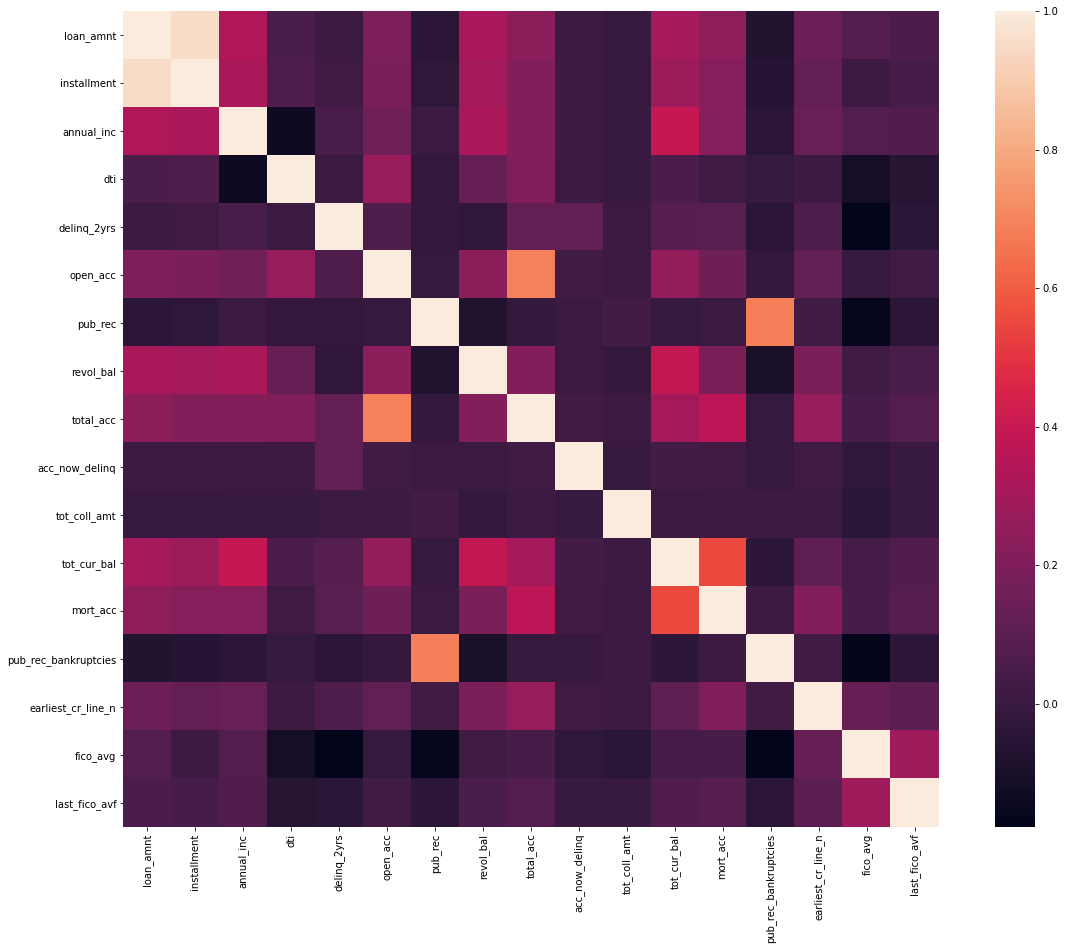

In [0]:
#import seaborn as sns
#from matplotlib import pyplot as plt
cor = df.corr() 
plt.subplots(figsize=(20,15))
sns.heatmap(cor, square = True)

We have reduced the number of features to 26. That's a long way from where we started. I am feeling good about it. Let's see if there are any more opportunities with our dataset. 

In [0]:
# Missing values statistics
miss_values = null_values(df)
miss_values.head(20)

Dataframe has 27 columns.
There are 10 columns that have missing values.


,Missing Values,% of Total Values
emp_length,15876,4.7
pub_rec_bankruptcies,1365,0.4
revol_util,298,0.1
delinq_2yrs,29,0.0
open_acc,29,0.0
pub_rec,29,0.0
total_acc,29,0.0
earliest_cr_line_n,29,0.0
dti,28,0.0
annual_inc,4,0.0


In [0]:
# Copy Dataframe
complete_df = df.copy()

With this, I am done with data cleaning. FINALLY!

I’ve been able to reduce the number of columns from 150 to 26 without losing any meaningful data from our model. 

Data Cleaning Summary: 
- Dropped Data that must have been captured after the application form. This would have messed up our model. 

- Imputed missing values with either 0 or median

- Created new feature out of existing (taking average of FICO_low and FICO_high)


"Our goal here is to predict whether a person will be able to pay off a loan or  he/she will default.
We can see from data dictionary that loan_status is the only field that describes a loan status.

Therefore, we will be using it as target column."



# 4. Target Variable

In [0]:
#What are the value counts for this variable?
complete_df['loan_status'].value_counts()

Fully Paid                                             242054
Charged Off                                             50440
Current                                                 36945
Does not meet the credit policy. Status:Fully Paid       1988
Late (31-120 days)                                       1206
Does not meet the credit policy. Status:Charged Off       761
In Grace Period                                           486
Late (16-30 days)                                         295
Default                                                    87
Name: loan_status, dtype: int64

In [0]:
type(complete_df['loan_status'][0])

str

#### Currently, this column contains text values that need to be converted to numerical values to be eligible for training a model. 

In [0]:
#Dependent Variable =  Loan_Status 

#Charged Off = 1
#Default = 1
#Late (31-120 days) = 1
#Does not meet credit policy. Status Charged Off = 1

#Current = 0
#Fully Paid = 0
#In Grace Period = 0
#Late (16-30 days) = 0
#Does not meet credit policy. Status Fully Paid = 0

In [0]:
complete_df['loan_status'] = complete_df['loan_status'].replace("Default", "Charged Off") #renaming the Charged off rows to Charged Off

In [0]:
complete_df['loan_status'] = complete_df['loan_status'].replace("Late (31-120 days)", "Charged Off") #renaming the "Late (31-120 days)" rows to Charged Off

In [0]:
complete_df['loan_status'] = complete_df['loan_status'].replace("Does not meet credit policy. Status Charged Off", "Charged Off") 
#renaming the "Does not meet credit policy. Status Charged Off" rows to Charged Off

In [0]:
complete_df['loan_status'].value_counts(dropna=False)

Fully Paid                                             242054
Charged Off                                             51733
Current                                                 36945
Does not meet the credit policy. Status:Fully Paid       1988
Does not meet the credit policy. Status:Charged Off       761
In Grace Period                                           486
Late (16-30 days)                                         295
Name: loan_status, dtype: int64

In [0]:
complete_df['loan_status'] = ['Charged Off' if i=='Charged Off' else 'Fully Paid' for i in complete_df['loan_status']]

There are 3,34,262 loan records. Check that the statuses are as expected:

In [0]:
complete_df['loan_status'].value_counts(dropna=False)

Fully Paid     282529
Charged Off     51733
Name: loan_status, dtype: int64

Status counts as percentages:

In [0]:
complete_df['loan_status'].value_counts(normalize=True, dropna=False)

Fully Paid     0.845232
Charged Off    0.154768
Name: loan_status, dtype: float64

About 84% of the loans have been fully paid and 16% have charged off, so we can see that we are dealing with an imbalanced dataset. This means one result type is dominating the other one(s). In this case, we have a lot of "fully paid" records but not many records of other 6 (charged off) records. 

Visualizing the Target Column Outcomes

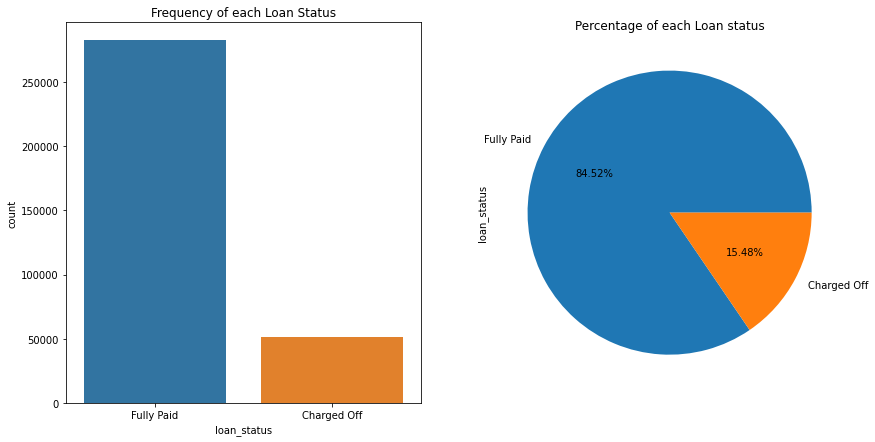

In [0]:
fig, axs = plt.subplots(1,2,figsize=(14,7))
sns.countplot(x='loan_status',data=complete_df,ax=axs[0])
axs[0].set_title("Frequency of each Loan Status")
complete_df.loan_status.value_counts().plot(x=None,y=None, kind='pie', ax=axs[1],autopct='%1.2f%%')
axs[1].set_title("Percentage of each Loan status")
plt.show()

In [0]:
#fig, axs = plt.subplots(1,2,figsize=(14,7))
#sns.countplot(x='TARGET',data=complete_df,ax=axs[0])
#axs[0].set_title("Frequency of each Loan Status")
#complete_df.TARGET.value_counts().plot(x=None,y=None, kind='pie', ax=axs[1],autopct='%1.2f%%')
#axs[1].set_title("Percentage of each Loan status")
#plt.show()

In [0]:
#removing the loan_status predicor as we have recoded the values from it to a new column ("Target") which is out depenednt variable
#complete_df = complete_df.drop('loan_status',axis=1,inplace=True) 
#complete_df = complete_df.drop(['loan_status'],axis=1)

In [0]:
complete_df.head(1)

,loan_amnt,term,installment,emp_length,home_ownership,annual_inc,verification_status,loan_status,addr_state,dti,delinq_2yrs,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,acc_now_delinq,tot_coll_amt,tot_cur_bal,mort_acc,pub_rec_bankruptcies,purpose_n,earliest_cr_line_n,fico_avg,last_fico_avf
0,5000,36 months,162.87,10+ years,RENT,24000.0,Verified,Fully Paid,AZ,0.002765,0.0,3.0,0.0,13648,83.70%,9.0,f,Individual,0.0,0.0,0.0,0.0,0.0,debt,35.329227,737.0,712.0


# 5. Further Pre-processing and Feature Engineering

We'll inspect each feature separately as it is not in readable range, and do the following:

- Drop the feature if it is not useful for predicting the Target variable.
- View summary statistics and visualize, plot against the Target variable.
- Modify the feature to make it useful for modeling, if necessary.
- We define a function for plotting a variable and comparing with the Target variable.

In [0]:
#Print the remaining predictos for future reference:
print(list(complete_df.columns))

['loan_amnt', 'term', 'installment', 'emp_length', 'home_ownership', 'annual_inc', 'verification_status', 'loan_status', 'addr_state', 'dti', 'delinq_2yrs', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 'initial_list_status', 'application_type', 'acc_now_delinq', 'tot_coll_amt', 'tot_cur_bal', 'mort_acc', 'pub_rec_bankruptcies', 'purpose_n', 'earliest_cr_line_n', 'fico_avg', 'last_fico_avf']


## 5.1 loan_amnt

In [0]:
complete_df['loan_amnt'].describe()

count    334262.000000
mean      13875.948283
std        8456.075067
min         500.000000
25%        7350.000000
50%       12000.000000
75%       19500.000000
max       40000.000000
Name: loan_amnt, dtype: float64

Loan amounts ranges from \$500 to \$40,000, with a median of \$12,000.

In [0]:
complete_df.groupby('loan_status')['loan_amnt'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,51733.0,14942.052462,8683.757605,900.0,8000.0,13475.0,20000.0,40000.0
Fully Paid,282529.0,13680.737287,8399.088211,500.0,7200.0,12000.0,19000.0,40000.0


## 5.2 term

In [0]:
complete_df['term'].value_counts(dropna=False)

 36 months    254366
 60 months     79896
Name: term, dtype: int64

In [0]:
complete_df['term'] = complete_df['term'].apply(lambda x: np.int8(x.split()[0]))

In [0]:
complete_df['term'].value_counts(normalize=True)

36    0.760978
60    0.239022
Name: term, dtype: float64

In [0]:
#Compare the charge-off rate by loan period:
complete_df.groupby('term')['loan_status'].value_counts(normalize=True).loc[:,'Charged Off']

term
36    0.129412
60    0.235494
Name: loan_status, dtype: float64

It is clear that loan with longer terms are more likely to charge off. 

## 5.3 installment

In [0]:
complete_df['installment'].describe()

count    334262.000000
mean        425.222429
std         253.955017
min           4.930000
25%         239.642500
50%         369.260000
75%         560.690000
max        1584.900000
Name: installment, dtype: float64

Installments range from \$4.93 to \$1,584, with a median of \$369.

In [0]:
complete_df.groupby('loan_status')['installment'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,51733.0,453.001568,259.210930,21.62,266.88,399.9,590.5,1584.9
Fully Paid,282529.0,420.135877,252.650639,4.93,234.99,364.7,553.8,1584.9


Charged-off loans have higher installments. 

## 5.4 emp_length

In [0]:
complete_df['emp_length'].head(3)

0    10+ years
1     < 1 year
2    10+ years
Name: emp_length, dtype: object

I'll be filling the null values (lesser than 1 year) with 0 assuming that the borrower hasn't worked many years and data is not recorded. Also, I'll be using regex to extract the number of years from all of the data.

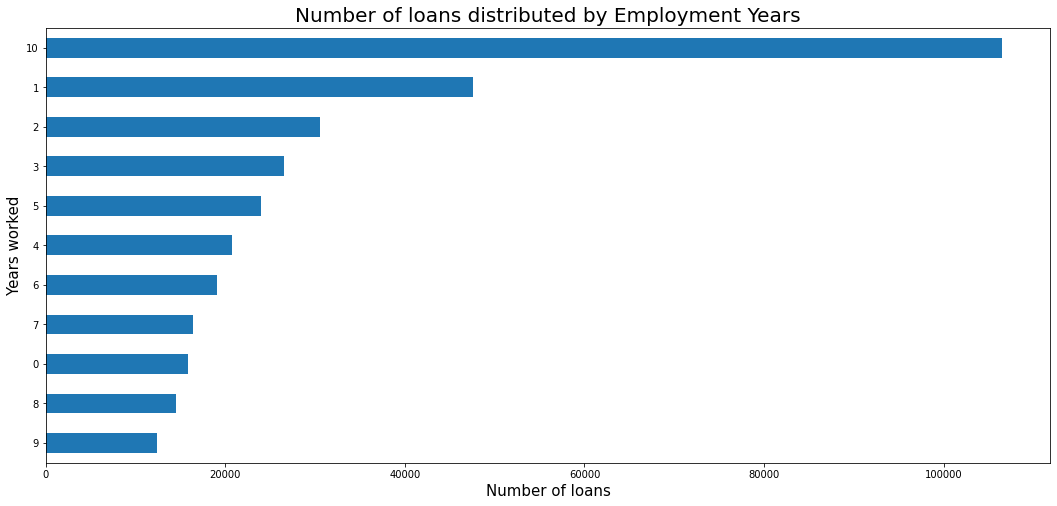

In [0]:
complete_df['emp_length'].fillna(value=0,inplace=True) #filling the missing values with 0 
complete_df['emp_length'].replace(to_replace='[^0-9]+', value='', inplace=True, regex=True ) #checking not numeric value and then replacng it with '' to removing string
complete_df['emp_length'].value_counts().sort_values().plot(kind='barh',figsize=(18,8)) #plotting the bar to see the emp_length
plt.title('Number of loans distributed by Employment Years',fontsize=20) #plotting the title
plt.xlabel('Number of loans',fontsize=15) #plotting number of loans for x axis
plt.ylabel('Years worked',fontsize=15); #plotting years worked for y axis

The column looks fine. Also, it can be seen that people who have worked for 10 or more years are more likely to take a loan.

## 5.5 home_ownership

In [0]:
complete_df['home_ownership'].value_counts(dropna=False)

MORTGAGE    166740
RENT        136303
OWN          30883
OTHER          182
ANY            104
NONE            50
Name: home_ownership, dtype: int64

In [0]:
#any and none are not very relevant for modeling. Therefore, clubbing them with Other. 
complete_df['home_ownership'].replace(['NONE', 'ANY'], 'OTHER', inplace=True)

In [0]:
complete_df['home_ownership'].value_counts(dropna=False)

MORTGAGE    166740
RENT        136303
OWN          30883
OTHER          336
Name: home_ownership, dtype: int64

In [0]:
complete_df.groupby('home_ownership')['loan_status'].value_counts(normalize=True).loc[:,'Charged Off']

home_ownership
MORTGAGE    0.138809
OTHER       0.148810
OWN         0.159894
RENT        0.173144
Name: loan_status, dtype: float64

There is not much difference in terms of home ownership. However,people who rent and own a house have a higher chance of charge-off. 

## 5.6 annual_inc

In [0]:
complete_df['annual_inc'].describe()

count    3.342580e+05
mean     7.447377e+04
std      6.245915e+04
min      0.000000e+00
25%      4.500000e+04
50%      6.324000e+04
75%      9.000000e+04
max      7.141778e+06
Name: annual_inc, dtype: float64

Annual income ranges from \$0 to \$7,141,778, with a median of \$6.324000e+04. Because of the large range of incomes, we can take a log of annual income variable.

In [0]:
complete_df['log_annual_inc'] = complete_df['annual_inc'].apply(lambda x: np.log10(x+1))
complete_df.drop('annual_inc', axis=1, inplace=True)

In [0]:
complete_df['log_annual_inc'].describe()

count    334258.000000
mean          4.805127
std           0.235807
min           0.000000
25%           4.653222
50%           4.800999
75%           4.954247
max           6.853806
Name: log_annual_inc, dtype: float64

In [0]:
complete_df.groupby('loan_status')['log_annual_inc'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,51733.0,4.771404,0.229359,0.0,4.623260,4.778158,4.903095,6.747330
Fully Paid,282525.0,4.811302,0.236449,0.0,4.653222,4.812920,4.954247,6.853806


Obviously, people with higher income are more likely to pay off their loans.



## 5.7 verification_status

In [0]:
complete_df['verification_status'].value_counts()

Verified           131804
Not Verified       107818
Source Verified     94640
Name: verification_status, dtype: int64

## 5.8 addr_state

In [0]:
complete_df['addr_state'].unique() #seeing the unique values of address state column

array(['AZ', 'GA', 'IL', 'CA', 'OR', 'NC', 'TX', 'VA', 'MO', 'CT', 'UT',
       'FL', 'NY', 'PA', 'MN', 'NJ', 'KY', 'OH', 'SC', 'RI', 'LA', 'MA',
       'WA', 'WI', 'AL', 'CO', 'KS', 'NV', 'AK', 'MD', 'WV', 'VT', 'MI',
       'DC', 'SD', 'NH', 'AR', 'NM', 'MT', 'HI', 'WY', 'OK', 'DE', 'MS',
       'TN', 'IA', 'NE', 'ID', 'IN', 'ME', 'ND'], dtype=object)

In [0]:
# Make a list with each of the regions by state.

west = ['CA', 'OR', 'UT','WA', 'CO', 'NV', 'AK', 'MT', 'HI', 'WY', 'ID'] #all western states
south_west = ['AZ', 'TX', 'NM', 'OK'] #all south western states
south_east = ['GA', 'NC', 'VA', 'FL', 'KY', 'SC', 'LA', 'AL', 'WV', 'DC', 'AR', 'DE', 'MS', 'TN' ] #all south eastern states
mid_west = ['IL', 'MO', 'MN', 'OH', 'WI', 'KS', 'MI', 'SD', 'IA', 'NE', 'IN', 'ND'] #all mid western states
north_east = ['CT', 'NY', 'PA', 'NJ', 'RI','MA', 'MD', 'VT', 'NH', 'ME'] #all north eastern states

In [0]:
complete_df['region'] = np.nan #creating new column region with all nan values
def finding_regions(state): #creating fuction to recode states into region
    if state in west:
        return 'West'
    elif state in south_west:
        return 'SouthWest'
    elif state in south_east:
        return 'SouthEast'
    elif state in mid_west:
        return 'MidWest'
    elif state in north_east:
        return 'NorthEast'
    
complete_df['region'] = complete_df['addr_state'].apply(finding_regions) #apply function to the new column

In [0]:
#Calculate the charge-off rates by region:
complete_df.groupby('region')['loan_status'].value_counts(normalize=True).loc[:,'Charged Off'].sort_values()

region
SouthWest    0.150104
West         0.150778
MidWest      0.150966
NorthEast    0.156404
SouthEast    0.162310
Name: loan_status, dtype: float64

It is almost similar by region. Let's see the same by state:

In [0]:
#Calculate the charge-off rates by state:
complete_df.groupby('addr_state')['loan_status'].value_counts(normalize=True).loc[:,'Charged Off'].sort_values()

addr_state
IA    0.076923
ME    0.082237
DC    0.094395
WV    0.114441
NH    0.117233
WY    0.118954
MT    0.121212
VT    0.121417
CO    0.125072
SC    0.129923
OR    0.132227
KS    0.132358
AK    0.135392
IL    0.136860
CT    0.138889
RI    0.139973
DE    0.141151
MA    0.141786
WA    0.143545
TX    0.144288
WI    0.145733
UT    0.147047
GA    0.148035
MN    0.149518
ID    0.150538
ND    0.151261
PA    0.153207
OH    0.154482
CA    0.154660
AZ    0.156379
MO    0.158431
VA    0.158684
KY    0.159833
MD    0.160000
NM    0.160887
SD    0.161765
MI    0.162742
NC    0.163247
NY    0.163524
NE    0.166362
HI    0.166574
NJ    0.167789
LA    0.169995
IN    0.170691
AR    0.171337
TN    0.173731
FL    0.174567
AL    0.175115
OK    0.179252
NV    0.182402
MS    0.187050
Name: loan_status, dtype: float64

The payment plan column (pymnt_plan) has two unique values, 'y' and 'n', with 'y' occurring only 30 times compared to 334232. Let’s drop this column.

## 5.9 dti

In [0]:
complete_df['dti'].describe()

count    334234.000000
mean          0.001712
std           0.000909
min           0.000000
25%           0.001121
50%           0.001677
75%           0.002265
max           0.099900
Name: dti, dtype: float64

Text(0.5, 1.0, 'Debt-to-income Ratio')

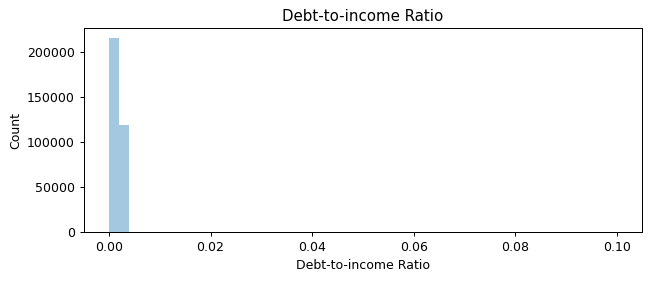

In [0]:
plt.figure(figsize=(8,3), dpi=90)
sns.distplot(complete_df.loc[complete_df['dti'].notnull() & (complete_df['dti']<60), 'dti'], kde=False)
plt.xlabel('Debt-to-income Ratio')
plt.ylabel('Count')
plt.title('Debt-to-income Ratio')

In [0]:
complete_df.groupby('loan_status')['dti'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,51729.0,0.001856,0.001192,0.0,0.001267,0.001841,0.002415,0.0999
Fully Paid,282505.0,0.001686,0.000845,0.0,0.001097,0.001646,0.002236,0.0999


## 5.10 delinq_2yrs :

The number of 30+ days past-due incidences of delinquency in the borrower's credit file for the past 2 years

In [0]:
complete_df.groupby('loan_status')['delinq_2yrs'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,51733.0,0.284055,0.814563,0.0,0.0,0.0,0.0,18.0
Fully Paid,282500.0,0.264127,0.767565,0.0,0.0,0.0,0.0,29.0


It does not tell us much as mean values for both status are same. Also, it is showing contradictory results that people who have more 30+ days past due incidences are more likely to fully pay the loan. Therefore, dropping it. 

In [0]:
complete_df = complete_df.drop(['delinq_2yrs'],axis=1)

In [0]:
complete_df.columns

Index(['loan_amnt', 'term', 'installment', 'emp_length', 'home_ownership',
       'verification_status', 'loan_status', 'addr_state', 'dti', 'open_acc',
       'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'initial_list_status', 'application_type', 'acc_now_delinq',
       'tot_coll_amt', 'tot_cur_bal', 'mort_acc', 'pub_rec_bankruptcies',
       'purpose_n', 'earliest_cr_line_n', 'fico_avg', 'last_fico_avf',
       'log_annual_inc', 'region'],
      dtype='object')

## 5.11 open_acc

Text(0.5, 1.0, 'Number of Open Credit Lines')

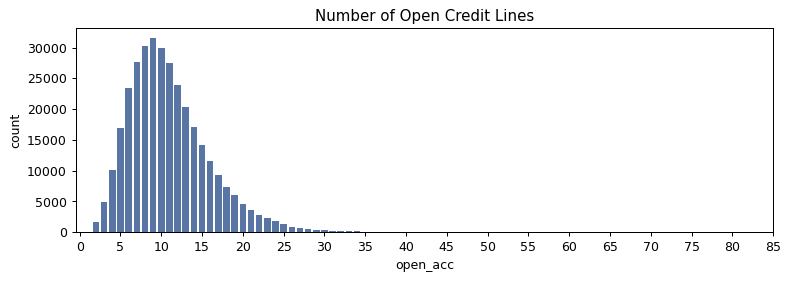

In [0]:
plt.figure(figsize=(10,3), dpi=90)
sns.countplot(complete_df['open_acc'], order=sorted(complete_df['open_acc'].unique()), color='#5975A4', saturation=1)
_, _ = plt.xticks(np.arange(0, 90, 5), np.arange(0, 90, 5))
plt.title('Number of Open Credit Lines')

In [0]:
#let's see the difference in number of credit lines between fully paid loans and charged-off loans
complete_df.groupby('loan_status')['open_acc'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,51733.0,11.180678,5.075576,0.0,8.0,10.0,14.0,64.0
Fully Paid,282500.0,10.985260,5.027652,0.0,7.0,10.0,14.0,97.0


not much difference

## 5.12 pub_rec

In [0]:
complete_df['pub_rec'].value_counts().sort_index()

0.0     293303
1.0      35205
2.0       3805
3.0       1093
4.0        431
5.0        180
6.0         97
7.0         48
8.0         28
9.0         10
10.0        10
11.0         8
12.0         2
13.0         5
14.0         2
16.0         1
17.0         1
19.0         1
24.0         1
49.0         1
54.0         1
Name: pub_rec, dtype: int64

let's see the difference in average public records between fully paid loans and charged-off loans



In [0]:
complete_df.groupby('loan_status')['pub_rec'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,51733.0,0.169892,0.490216,0.0,0.0,0.0,0.0,13.0
Fully Paid,282500.0,0.147416,0.498962,0.0,0.0,0.0,0.0,54.0


Not much difference

## 5.13 revol_bal

In [0]:
complete_df['revol_bal'].describe()

count    3.342620e+05
mean     1.607664e+04
std      2.075735e+04
min      0.000000e+00
25%      6.302000e+03
50%      1.153800e+04
75%      1.993000e+04
max      2.568995e+06
Name: revol_bal, dtype: float64

In [0]:
#doing log transform
complete_df['revol_bal'] = complete_df['revol_bal'].apply(lambda x: np.log10(x+1))

In [0]:
complete_df.groupby('loan_status')['revol_bal'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,51733.0,3.996781,0.518324,0.0,3.809021,4.063446,4.283708,6.242223
Fully Paid,282529.0,3.997403,0.550637,0.0,3.797890,4.061942,4.302461,6.409763


not much different in means

## 5.14 revol_util

Revolving line utilization rate, or the amount of credit the borrower is using relative to all available revolving credit.

In [0]:
complete_df['revol_util'].head()

0    83.70%
1     9.40%
2    98.50%
3       21%
4    53.90%
Name: revol_util, dtype: object

In [0]:
#We see that term, emp_length, revol_util columns contains numeric values, but is formatted as object. 
complete_df['revol_util'] = complete_df['revol_util'].str.rstrip('%').astype('float') #stripping the % symbol and converting the type to "Float"

In [0]:
complete_df['revol_util'].describe()

count    333964.000000
mean         54.726757
std          24.461582
min           0.000000
25%          36.900000
50%          56.200000
75%          74.100000
max         162.000000
Name: revol_util, dtype: float64

In [0]:
complete_df.groupby('loan_status')['revol_util'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,51686.0,58.059570,23.554142,0.0,41.4,59.9,76.7,162.0
Fully Paid,282278.0,54.116508,24.575247,0.0,36.1,55.5,73.6,140.4


People with higher Revolving line utilization rate are more likely to charge off

## 5.15 total_acc

Text(0.5, 1.0, 'Total Number of Credit Lines')

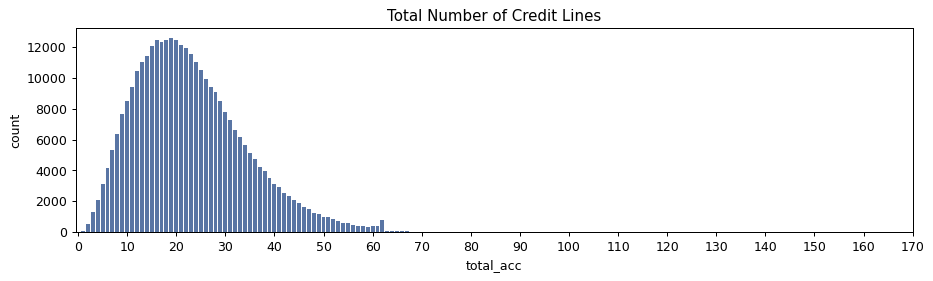

In [0]:
plt.figure(figsize=(12,3), dpi=90)
sns.countplot(complete_df['total_acc'], order=sorted(complete_df['total_acc'].unique()), color='#5975A4', saturation=1)
_, _ = plt.xticks(np.arange(0, 176, 10), np.arange(0, 176, 10))
plt.title('Total Number of Credit Lines')

In [0]:
complete_df.groupby('loan_status')['total_acc'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,51733.0,23.792550,11.384300,2.0,15.0,22.0,30.0,95.0
Fully Paid,282500.0,24.111409,11.440122,1.0,16.0,22.0,31.0,137.0


People with higher number of credit lines are more likely to fully pay. 

## 5.16 initial_list_status

In [0]:
#not really sure what W, F means here. 

In [0]:
complete_df.columns

Index(['loan_amnt', 'term', 'installment', 'emp_length', 'home_ownership',
       'verification_status', 'loan_status', 'addr_state', 'dti', 'open_acc',
       'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'initial_list_status', 'application_type', 'acc_now_delinq',
       'tot_coll_amt', 'tot_cur_bal', 'mort_acc', 'pub_rec_bankruptcies',
       'purpose_n', 'earliest_cr_line_n', 'fico_avg', 'last_fico_avf',
       'log_annual_inc', 'region'],
      dtype='object')

## 5.17 application_type

In [0]:
complete_df['application_type'].value_counts()

Individual    330126
Joint App       4136
Name: application_type, dtype: int64

In [0]:
complete_df.groupby('application_type')['loan_status'].value_counts(normalize=True).loc[:,'Charged Off']

application_type
Individual    0.15475
Joint App     0.15619
Name: loan_status, dtype: float64

Not much difference. dropping this too. Individual are more likely to charge off but there are more individuals in dataset then joint applications

## 5.18 acc_now_delinq

In [0]:
complete_df['acc_now_delinq'].head()

0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
Name: acc_now_delinq, dtype: float64

In [0]:
complete_df['acc_now_delinq'].value_counts()

0.0    333167
1.0      1032
2.0        51
3.0         6
4.0         3
5.0         2
6.0         1
Name: acc_now_delinq, dtype: int64

In [0]:
complete_df.groupby('acc_now_delinq')['loan_status'].value_counts(normalize=True).loc[:,'Charged Off']

acc_now_delinq
0.0    0.154733
1.0    0.164729
2.0    0.117647
3.0    0.666667
5.0    0.500000
Name: loan_status, dtype: float64

Too many 0 values and apart from that, outliers are present too. Therefore, dropping. 

In [0]:
complete_df = complete_df.drop(['application_type'],axis=1)

In [0]:
complete_df = complete_df.drop(['acc_now_delinq'],axis=1)

## 5.19 tot_coll_amt

In [0]:
complete_df['tot_coll_amt'].head()

0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
Name: tot_coll_amt, dtype: float64

In [0]:
complete_df['tot_coll_amt'].value_counts()

0.0        301766
50.0          498
100.0         390
75.0          319
60.0          223
            ...  
5151.0          1
12638.0         1
10809.0         1
1912.0          1
4095.0          1
Name: tot_coll_amt, Length: 5010, dtype: int64

## 5.20 tot_cur_bal

In [0]:
complete_df['tot_cur_bal'].value_counts()

0.0          70320
22396.0         13
13721.0         11
19830.0         11
14163.0         11
             ...  
3254633.0        1
50854.0          1
406833.0         1
406839.0         1
379567.0         1
Name: tot_cur_bal, Length: 170518, dtype: int64

## 5.21 mort_acc

In [0]:
complete_df['mort_acc'].describe()

count    334262.000000
mean          1.444023
std           2.000797
min           0.000000
25%           0.000000
50%           1.000000
75%           2.000000
max          61.000000
Name: mort_acc, dtype: float64

Somebody has 61 mortgage accounts. This could be an outlier or may be some one can. 



In [0]:
complete_df['mort_acc'].value_counts().head(10)

0.0    165817
1.0     49665
2.0     39534
3.0     29132
4.0     20373
5.0     13070
6.0      7690
7.0      4233
8.0      2222
9.0      1193
Name: mort_acc, dtype: int64

In [0]:
#comparing statistics by target variable:
complete_df.groupby('loan_status')['mort_acc'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,51733.0,1.266658,1.870066,0.0,0.0,0.0,2.0,27.0
Fully Paid,282529.0,1.476500,2.022139,0.0,0.0,1.0,2.0,61.0


People who pay off their loans have several mortgage accounts.

## 5.22 pub_rec_bankruptcies

In [0]:
complete_df['pub_rec_bankruptcies'].value_counts().sort_index()

0.0    301317
1.0     30255
2.0      1036
3.0       203
4.0        56
5.0        20
6.0         5
7.0         3
8.0         2
Name: pub_rec_bankruptcies, dtype: int64

In [0]:
#comparing statistics by target variable:
complete_df.groupby('loan_status')['pub_rec_bankruptcies'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,51615.0,0.114540,0.342788,0.0,0.0,0.0,0.0,7.0
Fully Paid,281282.0,0.097464,0.319220,0.0,0.0,0.0,0.0,8.0


People with more bankruptcy records are more likely to charge off. 

## 5.23 purpose_n

In [0]:
complete_df['purpose_n'].unique()

array(['debt', 'major_purchases', 'life_events', 'other'], dtype=object)

## 5.24 earliest_cr_line_n

In [0]:
complete_df['earliest_cr_line_n'].head()

0    35.329227
1    21.084189
2    18.496920
3    24.246407
4    24.331280
Name: earliest_cr_line_n, dtype: float64

In [0]:
complete_df['earliest_cr_line_n'].describe()

count    334233.000000
mean         21.752549
std           7.832563
min         -48.585900
25%          16.835044
50%          20.665298
75%          25.582478
max          51.329227
Name: earliest_cr_line_n, dtype: float64

In [0]:
#comparing statistics by target variable:
complete_df.groupby('loan_status')['earliest_cr_line_n'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,51733.0,21.100305,7.980588,-48.418891,16.33128,20.167009,24.835044,51.329227
Fully Paid,282500.0,21.871991,7.799259,-48.585900,16.91718,20.750171,25.749487,51.329227


## 5.25 fico_avg

In [0]:
complete_df.groupby('loan_status')['fico_avg'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,51733.0,692.216419,26.225367,662.0,672.0,687.0,707.0,847.5
Fully Paid,282529.0,701.865373,32.354865,612.0,677.0,697.0,717.0,847.5


Loans that charge off have a FICO score 9 points lesser on mean.

## 5.26 last_fico_avf

Last fico score is not applicable for modeling because it is not available at start of application

In [0]:
complete_df = complete_df.drop(['last_fico_avf'],axis=1)

## 5.27 log_annual_inc

In [0]:
complete_df['log_annual_inc'].describe()

count    334258.000000
mean          4.805127
std           0.235807
min           0.000000
25%           4.653222
50%           4.800999
75%           4.954247
max           6.853806
Name: log_annual_inc, dtype: float64

In [0]:
complete_df.groupby('loan_status')['log_annual_inc'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,51733.0,4.771404,0.229359,0.0,4.623260,4.778158,4.903095,6.747330
Fully Paid,282525.0,4.811302,0.236449,0.0,4.653222,4.812920,4.954247,6.853806


There is slight difference in mean which suggests people with better income are more likely to pay

## 5.28 region

In [0]:
complete_df = complete_df.drop(['region'],axis=1)

In [0]:
complete_df.columns

Index(['loan_amnt', 'term', 'installment', 'emp_length', 'home_ownership',
       'verification_status', 'loan_status', 'addr_state', 'dti', 'open_acc',
       'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'initial_list_status', 'tot_coll_amt', 'tot_cur_bal', 'mort_acc',
       'pub_rec_bankruptcies', 'purpose_n', 'earliest_cr_line_n', 'fico_avg',
       'log_annual_inc'],
      dtype='object')

### Dealing with Remaining missing values: Data imputation
 

To deal with missing values in each column, I will do some data imputation dealing with each dtype differently. For dtype = object, I will use the most frequent values while for numerical dtypes, I will use the median

In [0]:
obj_cols = complete_df.columns[complete_df.dtypes==object]

#Imputer function
imputer = lambda x:x.fillna(x.value_counts().index[0]) 

#Impute dtype=object with most frequent value
complete_df[obj_cols] = complete_df[obj_cols].apply(imputer) 

#Impute the rest of df with median
complete_df = complete_df.fillna(df.median(axis=0)) 

In [0]:
missing_fractions = complete_df.isnull().mean().sort_values(ascending=False) # Fraction of data missing for each variable
print(missing_fractions[missing_fractions > 0]) # Print variables that are missing data

revol_util        0.000892
log_annual_inc    0.000012
dtype: float64


In [0]:
#print(complete_df.isnull().sum())
complete_df.fillna(complete_df.median(), inplace=True)


In [0]:
complete_df.head(1)

0    83.7
Name: revol_util, dtype: float64

### Saving CSV with the processing until now. 

In [0]:
complete_df.to_csv("/content/drive/My Drive/Lending_Club/clean_df_23_col.csv",index=False)

In [0]:
#complete_df.to_csv('clean_df_23_col_.csv') #save csv to my drive by the name lending_club_cleaned1
#!cp lending_club_cleaned1.csv "/content/drive/My Drive/Lending_Club/"

In [0]:
#import pickle
#complete_df.to_pickle("clean_final_23_col.pkl")
#df_filtered = pd.read_pickle("/content/drive/My Drive/lending_loan_df.pkl")

#### READING CLEANED FILE FOR FURTHER MODELING

In [0]:
#complete_df = pd.read_csv("/content/drive/My Drive/lending_club_cleaned1.csv")

In [0]:
corr = complete_df.corr()['TARGET'].sort_values()
# Display correlations
print('Most Positive Correlations:\n', corr.tail(10))
print('\nMost Negative Correlations:\n', corr.head(10))

# 6 Processing Categorical Variables

Here’s an outline of what we’ll be doing in this stage:

- Investigate Categorical Columns
- Convert Categorical Columns To Numeric Features
- Map Ordinal Values To Integers
- Encode Nominal Values As Dummy *Variables*

It can be seen that there are more number of loans taken amount from the same states where there are more number of defaulted risk. This is why the state cannot be taken as a major feature for knowing if a loan will be defaulted or not.



In [0]:
complete_df = complete_df.drop(['addr_state'],axis=1)

#### Convert loan status to 0/1 charge-off indicator
Change the response variable loan_status to a 0/1 variable, where 0 indicates fully paid and 1 indicates charge-off:

In [0]:
target_list = [1 if i=='Charged Off' else 0 for i in complete_df['loan_status']]
complete_df['charged_off'] = target_list
complete_df['charged_off'].value_counts()
complete_df.drop('loan_status', axis=1, inplace=True)

In [0]:
#how many variable we have now
print(complete_df.shape)
complete_df.head(1)

(334262, 22)


,loan_amnt,term,installment,emp_length,home_ownership,verification_status,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,tot_coll_amt,tot_cur_bal,mort_acc,pub_rec_bankruptcies,purpose_n,earliest_cr_line_n,fico_avg,log_annual_inc,charged_off
0,5000,36,162.87,10,RENT,Verified,0.002765,3.0,0.0,4.135101,83.7,9.0,f,0.0,0.0,0.0,0.0,debt,35.329227,737.0,4.380229,0


In [0]:
null_counts = complete_df.isnull().sum().sort_index()
print("Number of null values in each column:\n{}".format(null_counts))

Number of null values in each column:
charged_off               0
dti                       0
earliest_cr_line_n        0
emp_length                0
fico_avg                  0
home_ownership            0
initial_list_status       0
installment               0
loan_amnt                 0
log_annual_inc            4
mort_acc                  0
open_acc                  0
pub_rec                   0
pub_rec_bankruptcies      0
purpose_n                 0
revol_bal                 0
revol_util              298
term                      0
tot_coll_amt              0
tot_cur_bal               0
total_acc                 0
verification_status       0
dtype: int64


In [0]:
print("Data types and their frequency\n{}".format(complete_df.dtypes.value_counts()))

Data types and their frequency
float64    14
object      5
int64       3
dtype: int64


### CATEGORICAL FEATURES

We still have 5 object columns that contain text which need to be converted into numeric features. 

Let’s select just the object columns using the DataFrame method select_dtype, then display a sample row to get a better sense of how the values in each column are formatted.

In [0]:
object_columns_df = complete_df.select_dtypes(include=['object'])
print(object_columns_df.iloc[0])

emp_length                   10
home_ownership             RENT
verification_status    Verified
initial_list_status           f
purpose_n                  debt
Name: 0, dtype: object


Columns with categorical values:

- emp_length — number of years the borrower was employed upon time of application.
- home_ownership — home ownership status, can only be 1 of 4 categorical values according to the data dictionary.
- verification_status — indicates if income was verified by LendingClub.
- initial_list_status — Initial listing status (W,F)
- purpose_n — a category provided by the borrower for the loan request.

In [0]:
cols = ['emp_length','home_ownership','verification_status', 'purpose_n', 'initial_list_status']
for name in cols:
    print(name,':')
    print(object_columns_df[name].value_counts(),'\n')

emp_length :
10    106549
1      47613
2      30541
3      26575
5      24020
4      20745
6      19079
7      16432
0      15876
8      14495
9      12337
Name: emp_length, dtype: int64 

home_ownership :
MORTGAGE    166740
RENT        136303
OWN          30883
OTHER          336
Name: home_ownership, dtype: int64 

verification_status :
Verified           131804
Not Verified       107818
Source Verified     94640
Name: verification_status, dtype: int64 

purpose_n :
debt               260151
major_purchases     38518
other               20703
life_events         14890
Name: purpose_n, dtype: int64 

initial_list_status :
f    220101
w    114161
Name: initial_list_status, dtype: int64 



In [0]:
#converting the type of emp_length column to int64 from string
complete_df['emp_length'] = complete_df['emp_length'].astype('int64') 

In [0]:
object_columns_df = complete_df.select_dtypes(include=['object'])
print(object_columns_df.iloc[0])

home_ownership             RENT
verification_status    Verified
initial_list_status           f
purpose_n                  debt
Name: 0, dtype: object


#### Convert Categorical Columns to Numeric Features

Ordinal values: these categorical values are in natural order. We can sort or order them either in increasing or decreasing order. 
For example: S < M < L

Nominal Values: these are regular categorical values. We can’t order nominal values. For instance, while we can order loan applicants in the employment length column (emp_length) based on years spent in the workforce:
year 1 < year 2 < year 3 … < year N,

we can’t do that with the column purpose. It wouldn’t make sense to say:

car < wedding < education < moving < house

These are the columns we now have in our dataset:

Ordinal Values
emp_length
Nominal Values _ home_ownership
verification_status
purpose_n
term

In [0]:
#Converting nominal features into numerical features requires encoding them as dummy variables.
nominal_columns = ["home_ownership", "verification_status", "purpose_n", "initial_list_status"]
dummy_df = pd.get_dummies(complete_df[nominal_columns], drop_first=True) #greating dummies for the above nominal columns and removing first dummy variable to 
#drop the first one to avoid linear dependency between the resulted features since some algorithms may struggle with this issue.
complete_df = pd.concat([complete_df, dummy_df], axis=1) #merging the newly created dummy columns with the working dataset
complete_df = complete_df.drop(nominal_columns, axis=1) #dropping the original nominal columns as they are not required anymore

#df = pd.get_dummies(df, columns=["purpose"], drop_first=True)

In [0]:
complete_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 334262 entries, 0 to 334261
Data columns (total 27 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   loan_amnt                            334262 non-null  int64  
 1   term                                 334262 non-null  int64  
 2   installment                          334262 non-null  float64
 3   emp_length                           334262 non-null  int64  
 4   dti                                  334262 non-null  float64
 5   open_acc                             334262 non-null  float64
 6   pub_rec                              334262 non-null  float64
 7   revol_bal                            334262 non-null  float64
 8   revol_util                           333964 non-null  float64
 9   total_acc                            334262 non-null  float64
 10  tot_coll_amt                         334262 non-null  float64
 11  tot_cur_bal  

In [0]:
#let's see how many predictors are there now
complete_df.shape

(334262, 27)

In [0]:
#let's see the dataframe now with dummy variables:
complete_df.head()

,loan_amnt,term,installment,emp_length,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,tot_coll_amt,tot_cur_bal,mort_acc,pub_rec_bankruptcies,earliest_cr_line_n,fico_avg,log_annual_inc,charged_off,home_ownership_OTHER,home_ownership_OWN,home_ownership_RENT,verification_status_Source Verified,verification_status_Verified,purpose_n_life_events,purpose_n_major_purchases,purpose_n_other,initial_list_status_w
0,5000,36,162.87,10,0.002765,3.0,0.0,4.135101,83.7,9.0,0.0,0.0,0.0,0.0,35.329227,737.0,4.380229,0,0,0,1,0,1,0,0,0,0
1,2500,60,59.83,1,0.000100,3.0,0.0,3.227372,9.4,4.0,0.0,0.0,0.0,0.0,21.084189,742.0,4.477136,1,0,0,1,1,0,0,1,0,0
2,2400,36,84.33,10,0.000872,2.0,0.0,3.470851,98.5,10.0,0.0,0.0,0.0,0.0,18.496920,737.0,4.088242,0,0,0,1,0,0,1,0,0,0
3,10000,36,339.31,10,0.002000,10.0,0.0,3.748110,21.0,37.0,0.0,0.0,0.0,0.0,24.246407,692.0,4.691974,0,0,0,1,1,0,0,0,1,0
4,3000,60,67.79,1,0.001794,15.0,0.0,4.443795,53.9,38.0,0.0,0.0,0.0,0.0,24.331280,697.0,4.903095,0,0,0,1,1,0,0,0,1,0


By now, we are almost done with all the pre-processes required before Machine Learning Modeling. 

We have two more categorical precitors to deal with "Region" and "Desc". 

In [0]:
#complete_df['region'].unique()

In [0]:
#complete_df['region'].value_counts()

In [0]:
#Converting region into dummy variable too.
#nominal_columns2 = ["region"]
#dummy_df2 = pd.get_dummies(complete_df[nominal_columns2], drop_first=True) #greating dummies for the above nominal columns and removing first dummy variable to 
#avoid linear dependency between the resulted features since some algorithms may struggle with this issue.
#complete_df = pd.concat([complete_df, dummy_df2], axis=1) #merging the newly created dummy columns with the working dataset
#complete_df = complete_df.drop(nominal_columns2, axis=1) #dropping the original nominal columns as they are not required anymore

#df = pd.get_dummies(df, columns=["purpose"], drop_first=True)

#### PICKLE AFTER CATEGORICAL CLEANING

In [0]:
complete_df.to_pickle("/content/drive/My Drive/Lending_Club/loan_clean_final.pkl")

### READING THE SAVED PICKLE

In [0]:
DATA_PATH = "/content/drive/My Drive/Capstone Project - NLP"
infile = open(DATA_PATH+'/lending_loan_df_clean_complete.pkl','rb')
complete_df = pickle.load(infile)

In [0]:
#complete_df['desc2'] = complete_df['desc1'].str.len() #creating a column with length of the cleaned description

In [9]:
print(f"{complete_df.dtypes}\n")

Unnamed: 0                               int64
loan_amnt                                int64
installment                            float64
emp_length                               int64
annual_inc                             float64
desc                                    object
dti                                    float64
delinq_2yrs                            float64
inq_last_6mths                         float64
open_acc                               float64
pub_rec                                float64
revol_bal                                int64
revol_util                             float64
total_acc                              float64
acc_now_delinq                         float64
tot_coll_amt                           float64
tot_cur_bal                            float64
total_bal_il                           float64
open_rv_12m                            float64
max_bal_bc                             float64
all_util                               float64
total_rev_hi_

#### get correlation with binary outcome

In [12]:
var_cor = pd.DataFrame((complete_df.corr()['TARGET'])).reset_index()
var_cor.columns=['index', 'correlation']
var_cor

,index,correlation
0,Unnamed: 0,0.014822
1,loan_amnt,0.053949
2,installment,0.046807
3,emp_length,-0.012815
4,annual_inc,-0.042770
5,dti,0.067529
6,delinq_2yrs,0.009312
7,inq_last_6mths,0.048207
8,open_acc,0.014044
9,pub_rec,0.016345


The variables most linearly correlated with charged_off are the term, FICO score, debt-to-income ratio, number of mortgages, income, and the loan amount.

In [13]:
# Copy Dataframe
new_df = complete_df.copy()
new_df.head(1)

,Unnamed: 0,loan_amnt,installment,emp_length,annual_inc,desc,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_bal_il,open_rv_12m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,mort_acc,num_accts_ever_120_pd,pub_rec_bankruptcies,earliest_cr_line_n,fico_avg,last_fico_avf,TARGET,home_ownership_MORTGAGE,home_ownership_NONE,home_ownership_OTHER,home_ownership_OWN,home_ownership_RENT,verification_status_Source Verified,verification_status_Verified,purpose_n_life_events,purpose_n_major_purchases,purpose_n_other,term_ 60 months,region_NorthEast,region_SouthEast,region_SouthWest,region_West
0,0,5000,162.87,10,24000.0,Borrower added on 12/22/11 > I need to upgra...,0.002765,0.0,1.0,3.0,0.0,13648,83.7,9.0,0.0,0.0,0.0,0.0,1.0,0.0,61.0,23500.0,0.0,0.0,0.0,0.0,0.0,35.323751,737.0,712.0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0


In [0]:
new_df = new_df.drop(['Unnamed: 0'],axis=1)

## Upsampling the smaller class: 

We will use sklearn's __resample()__ method for upsampling. Here, we will upsample 1 values in the data to match the 0 values (282.5 K)

__Important note:__ For upsampling, we have to use __replace=True__ 

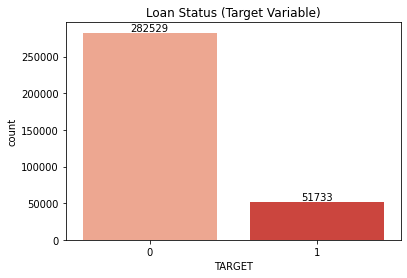

In [16]:
import matplotlib.pyplot as plt
import seaborn as sb
df2 = new_df
plt.figure()
ax = sb.countplot(x=new_df["TARGET"], y = None, palette = "Reds")
for p in ax.patches:
    x=p.get_bbox().get_points()[:,0]
    y=p.get_bbox().get_points()[1,1]
    ax.annotate('{:.0f}'.format(y), (x.mean(), y), ha='center', va='bottom') 
plt.title('Loan Status (Target Variable)')
plt.show()

In [17]:
from sklearn.utils import shuffle, resample

# Let's seperate our data into two based on the Score (True or False). 
df_zero = df2[df2["TARGET"] == 0]
df_one = df2[df2["TARGET"] == 1]

print("Number of records before upsampling: ")
print("One:", len(df_one), "Zero:", len(df_zero))

# Let's use the resample function for upsampling.
df_one = resample(df_one, replace=True, n_samples=len(df_zero))

# Let's put the separated data frames together. 
df2 = pd.concat([df_zero, df_one], axis=0)

# Let's shuffle the data
df2 = shuffle(df2)

print("Number of records after upsampling: ")
print("One:", len(df2[df2["TARGET"] == 0]), "Zero:", len(df2[df2["TARGET"] == 1]))

Number of records before upsampling: 
One: 51733 Zero: 282529
Number of records after upsampling: 
One: 282529 Zero: 282529


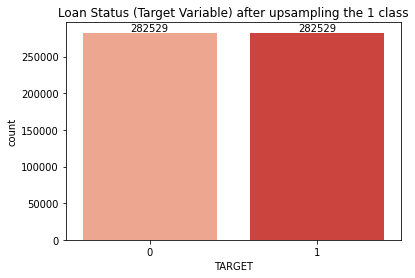

In [19]:
import matplotlib.pyplot as plt
import seaborn as sb

plt.figure()
ax = sb.countplot(x=df2["TARGET"], y = None, palette = "Reds")
for p in ax.patches:
    x=p.get_bbox().get_points()[:,0]
    y=p.get_bbox().get_points()[1,1]
    ax.annotate('{:.0f}'.format(y), (x.mean(), y), ha='center', va='bottom') 
plt.title('Loan Status (Target Variable) after upsampling the 1 class')
plt.show()

## PICKLE BEFORE MODELING

In [0]:
#df2 = df2.drop(['desc'],axis=1)

In [0]:
df2.to_pickle("/content/drive/My Drive/Lending_Club/loan_ready_for_ml.pkl")

In [0]:
#Reading pickled df
import pickle
#drive.mount('/content/drive')
DATA_PATH = "/content/drive/My Drive/Capstone Project - NLP"
infile = open(DATA_PATH+'/loan_dfready_for_model.pkl','rb')
df2 = picklenull_counts = df2.isnull().sum().sort_index()
print("Number of null values in each column:\n{}".format(null_counts)).load(infile)

In [21]:
null_counts = df2.isnull().sum().sort_index()
print("Number of null values in each column:\n{}".format(null_counts))

Number of null values in each column:
TARGET                                 0
acc_now_delinq                         0
all_util                               0
annual_inc                             0
delinq_2yrs                            0
desc                                   0
dti                                    0
earliest_cr_line_n                     0
emp_length                             0
fico_avg                               0
home_ownership_MORTGAGE                0
home_ownership_NONE                    0
home_ownership_OTHER                   0
home_ownership_OWN                     0
home_ownership_RENT                    0
inq_fi                                 0
inq_last_6mths                         0
installment                            0
last_fico_avf                          0
loan_amnt                              0
max_bal_bc                             0
mort_acc                               0
num_accts_ever_120_pd                  0
open_acc           

### Natural Language Processing Implementation on 'desc' column!

In [24]:
df2['desc'].head()

81050       Borrower added on 10/03/13 > I'm making mini...
329026                                                     
202217      Borrower added on 08/16/12 > I am using this...
211047      Borrower added on 06/22/12 > My loan will be...
27793       Borrower added on 07/17/10 > Full-time worke...
Name: desc, dtype: object

In [0]:
#Impute the rest of df with median
#df2 = df2.fillna(df2.median(axis=0)) 

In [0]:
snow = SnowballStemmer('english') #Initializing snowball stemmer from NLTK library

In [0]:
stop_words = stopwords.words("english")
def process_text(texts): 
    final_text_list=[]
    for sent in texts:
        filtered_sentence=[]
        
        sent = sent.lower() # Lowercase 
        sent = sent.strip() # Remove leading/trailing whitespace
        sent = re.sub('\s+', ' ', sent) # Remove extra space and tabs
        sent = re.compile('<.*?>').sub('', sent) # Remove HTML tags/markups:
        
        for w in word_tokenize(sent):
            # We are applying some custom filtering here.
            # Check if it is not numeric and its length>2 and not in stop words
            if(not w.isnumeric()) and (len(w)>2) and (w not in stop_words):  
                # Stem and add to filtered list
                filtered_sentence.append(snow.stem(w))
        final_string = " ".join(filtered_sentence) #final string of cleaned words
 
        final_text_list.append(final_string)
    
    return final_text_list

In [31]:
print("Pre-processing the training text field")
df2["desc"] = process_text(df2["desc"].tolist()) #applying above function on desc column

Pre-processing the training text field


In [32]:
df2.columns

Index(['loan_amnt', 'installment', 'emp_length', 'annual_inc', 'desc', 'dti',
       'delinq_2yrs', 'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal',
       'revol_util', 'total_acc', 'acc_now_delinq', 'tot_coll_amt',
       'tot_cur_bal', 'total_bal_il', 'open_rv_12m', 'max_bal_bc', 'all_util',
       'total_rev_hi_lim', 'inq_fi', 'total_cu_tl', 'mort_acc',
       'num_accts_ever_120_pd', 'pub_rec_bankruptcies', 'earliest_cr_line_n',
       'fico_avg', 'last_fico_avf', 'TARGET', 'home_ownership_MORTGAGE',
       'home_ownership_NONE', 'home_ownership_OTHER', 'home_ownership_OWN',
       'home_ownership_RENT', 'verification_status_Source Verified',
       'verification_status_Verified', 'purpose_n_life_events',
       'purpose_n_major_purchases', 'purpose_n_other', 'term_ 60 months',
       'region_NorthEast', 'region_SouthEast', 'region_SouthWest',
       'region_West'],
      dtype='object')

These are the columns that we are going to use for modeling.

# 7. Training and test subsets
We will split our dataset into training (80%) and test (20%) subsets. Sklearn's "train_test_split()" function is a useful function to use here.

In [0]:
X_train, X_val, y_train, y_val = train_test_split(df2.drop(["TARGET"], axis=1), # Input
                                                  df2['TARGET'].tolist(), # Target field
                                                  test_size=0.2, # 20% val, 80% tranining
                                                  shuffle=True) # Shuffle the whole dataset

### NLP Continued 

Let's get our binary vectors for the text field

In [0]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
 
# Initialize the binary count vectorizer
tfidf_vectorizer = CountVectorizer(binary=True,
                                   max_features=50    # Limit the vocabulary size
                                  )
# Fit and transform
X_train_text_vectors = tfidf_vectorizer.fit_transform(X_train["desc"].tolist())
# Only transform
X_val_text_vectors = tfidf_vectorizer.transform(X_val["desc"].tolist())

In [43]:
print(tfidf_vectorizer.vocabulary_)

{'year': 49, 'plan': 40, 'need': 35, 'get': 22, 'loan': 29, 'one': 36, 'work': 47, 'use': 45, 'help': 23, 'pay': 38, 'borrow': 15, 'ad': 13, '09': 8, '10': 9, '11': 10, 'debt': 20, 'job': 27, 'look': 30, 'consolid': 17, 'bill': 14, '05': 4, '12': 11, 'time': 44, 'rate': 41, '13': 12, 'want': 46, '04': 3, 'credit': 18, 'card': 16, 'high': 24, 'interest': 26, '03': 2, 'home': 25, 'lower': 31, 'would': 48, '02': 1, 'like': 28, 'month': 34, 'payment': 39, 'make': 32, '07': 6, '08': 7, '01': 0, 'paid': 37, 'current': 19, 'thank': 43, 'fund': 21, '06': 5, 'save': 42, 'money': 33}


In [0]:
X_train = X_train.drop(['desc'],axis=1) #dropping desc from X_train as we have processed it in X_train_text_vectors
X_val = X_val.drop(['desc'],axis=1) #dropping desc from X_val as well as we have processed it in X_val_text_vectors

In [0]:
# Let' merge our features
X_train_features = np.column_stack((X_train_text_vectors.toarray(), 
                                    X_train)
                                  )
# Let' merge our features
X_val_features = np.column_stack((X_val_text_vectors.toarray(), 
                                    X_val)
                                  )

## 8. Fitting the classifier

> Logistic Regression

In [46]:
#importing necessary libraries for logistic regression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import make_scorer, accuracy_score, f1_score

lrClassifier = LogisticRegression()
lrClassifier.fit(X_train_features, y_train)
predicted = lrClassifier.predict(X_val_features)
print("LogisticRegression on Validation: Accuracy Score: %f, F1-score: %f" % 
      (accuracy_score(y_val, predicted), f1_score(y_val, predicted)))

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression on Validation: Accuracy Score: 0.671628, F1-score: 0.615862


## The accuracy score is 67% (which ain't great) with F1 score of 61% but it's a start.

In [47]:
# generate evaluation metrics
probs = lrClassifier.predict_proba(X_val_features)
predicted = lrClassifier.predict(X_val_features)
accuracy = accuracy_score(y_val, predicted)
auc = metrics.roc_auc_score(y_val, probs[:, 1])

print(f'AUC estimate: {auc:.3}')
print(f'Mean accuracy score: {accuracy:.3}')
print(metrics.confusion_matrix(y_val, predicted))
print(metrics.classification_report(y_val, predicted))

AUC estimate: 0.775
Mean accuracy score: 0.672
[[46154 10392]
 [26718 29748]]
              precision    recall  f1-score   support

           0       0.63      0.82      0.71     56546
           1       0.74      0.53      0.62     56466

    accuracy                           0.67    113012
   macro avg       0.69      0.67      0.66    113012
weighted avg       0.69      0.67      0.66    113012



> To improve the performance of LogisticRegression we can tune its parameters, for example:
* regularization type: penalty = {l1, l2, elasticnet}
* regularization strength: C = {smaller values specify stronger regularization} 
*!!! LogisticRegression regularized cost function: C*Cost(w) + penalty(w), 
where w is the weights vector !!!


In [48]:
lrClassifier = LogisticRegression(penalty = 'l2', #calling the object with l2 NORM penalty and alpha value of 0.1
                                  C = 0.1)
lrClassifier.fit(X_train_features, y_train) #fitting the logistic regression on the training part of the data
predicted = lrClassifier.predict(X_val_features) #predicting on validation set

print("LogisticRegression on Validation: Accuracy Score: %f, F1-score: %f" %  
      (accuracy_score(y_val, predicted), f1_score(y_val, predicted)))#printing the accuracy and f1 score 

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression on Validation: Accuracy Score: 0.645560, F1-score: 0.592620


In [49]:
# generate evaluation metrics
probs = lrClassifier.predict_proba(X_val_features)
predicted = lrClassifier.predict(X_val_features)
accuracy = accuracy_score(y_val, predicted)
auc = metrics.roc_auc_score(y_val, probs[:, 1])

print(f'AUC estimate: {auc:.3}')
print(f'Mean accuracy score: {accuracy:.3}')
print(metrics.confusion_matrix(y_val, predicted))
print(metrics.classification_report(y_val, predicted))

AUC estimate: 0.732
Mean accuracy score: 0.646
[[43821 12725]
 [27331 29135]]
              precision    recall  f1-score   support

           0       0.62      0.77      0.69     56546
           1       0.70      0.52      0.59     56466

    accuracy                           0.65    113012
   macro avg       0.66      0.65      0.64    113012
weighted avg       0.66      0.65      0.64    113012



> We see that there is no improvement at all but score decreased due to sparse features which became very low with the regularization

> Trying to improve: Probability threshold calibration

Besides tuning __LogisticRegression__ hyperparameter values, one other path to improve a classifier's performance is to dig deeper into how the classifier actually assigns class membership.

**Binary predictions versus probability predictions.** We often use __classifier.predict()__ to examine classifier binary predictions, while in fact the outputs of most classifiers are real-valued, not binary. For most classifiers in sklearn, the method __classifier.predict_proba()__ returns class probabilities as a two-dimensional numpy array of shape (n_samples, n_classes) where the classes are lexicographically ordered. 

For our example, let's look at the first 5 predictions we made, in binary format and in real-valued probability format:




In [50]:
lrClassifier.predict(X_val_features)[0:5] #checking first 5 predicted value via usual binary format

array([0, 1, 0, 1, 0])

In [51]:
lrClassifier.predict_proba(X_val_features)[0:5] #checking first 5 predicted values via probablity format

array([[0.58672029, 0.41327971],
       [0.39197357, 0.60802643],
       [0.75417371, 0.24582629],
       [0.14606573, 0.85393427],
       [0.51131908, 0.48868092]])

**How are the predicted probabilities used to decide class membership?** On each row of predict_proba output, the probabilities values sum to 1. There are two columns, one for each response class: column 0 - predicted probability that each observation is a member of class 0; column 1 - predicted probability that each observation is a member of class 1. From the predicted probabilities, choose the class with the highest probability.

The key here is that a **threshold of 0.5** is used by default (for binary problems) to convert predicted probabilities into class predictions: class 0, if predicted probability is less than 0.5; class 1, if predicted probability is greater than 0.5.

**Can we improve classifier performance by changing the classification threshold?** Let's **adjust** the classification threshold to influence the performance of the classifier. 

> Threshold calibration to improve model accuracy

We calculate the accuracy using different values for the classification threshold, and pick the threshold that resulted in the highest accuracy.

Highest Accuracy on Validation: 0.6688758715888579 , Threshold for the highest Accuracy: 0.4


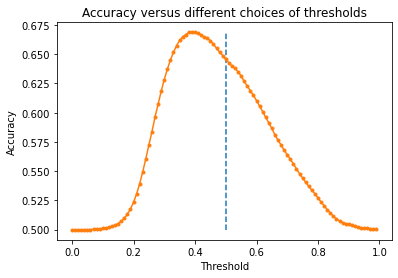

In [52]:
%matplotlib inline 
import numpy as np #importing numpy library
import matplotlib.pyplot as plt #importing matplotlib library for plotting the results

# Calculate the accuracy using different values for the classification threshold, 
# and pick the threshold that resulted in the highest accuracy.
highest_accuracy = 0 #initializing highest_accuracy variable
threshold_highest_accuracy = 0 #initializing threshold_highest_accuracy variable

thresholds = np.arange(0,1,0.01) #
scores = []
for t in thresholds:
    # set threshold to 't' instead of 0.5
    y_val_other = (lrClassifier.predict_proba(X_val_features)[:,1] >= t).astype(float)
    score = accuracy_score(y_val, y_val_other)
    scores.append(score)
    if(score > highest_accuracy):
        highest_accuracy = score
        threshold_highest_accuracy = t
print("Highest Accuracy on Validation:", highest_accuracy, \
      ", Threshold for the highest Accuracy:", threshold_highest_accuracy)   

# Let's plot the accuracy versus different choices of thresholds
plt.plot([0.5, 0.5], [np.min(scores), np.max(scores)], linestyle='--')
plt.plot(thresholds, scores, marker='.')
plt.title('Accuracy versus different choices of thresholds')
plt.xlabel('Threshold')
plt.ylabel('Accuracy')
plt.show()

### We see that there is slight improvement in performance

> Threshold calibration to improve model F1 score

Similarly, various choices of classification thresholds would affect the Precision and Recall metrics. Precision and Recall are usually trade offs of each other, so when you can improve both at the same time, your model's overall performance is undeniably improved. To choose a threshold that balances Precision and Recall, we can plot the Precision-Recall curve and pick the point with the highest F1 score. **bold text**

In [0]:
%matplotlib inline 
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve

# Calculate the precision and recall using different values for the classification threshold
val_predictions_probs = lrClassifier.predict_proba(X_val_features)
precisions, recalls, thresholds = precision_recall_curve(y_val, val_predictions_probs[:, 1])

Using the Precision and Recall values from the curve above, we calculate the F1 scores using:

$$\text{F1_score} = \frac{2*(\text{Precision} * \text{Recall})}{(\text{Precision} + \text{Recall})}$$

and pick the threshold that gives the highest F1 score.

Highest F1 score on Validation: 0.7187309591343628 , Threshold for the highest F1 score: 0.3188659357261326


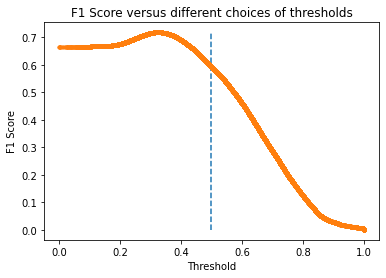

In [54]:
%matplotlib inline 
import numpy as np
import matplotlib.pyplot as plt

# Calculate the F1 score using different values for the classification threshold, 
# and pick the threshold that resulted in the highest F1 score.
highest_f1 = 0
threshold_highest_f1 = 0

f1_scores = []
for id, threhold in enumerate(thresholds):
    f1_score = 2*precisions[id]*recalls[id]/(precisions[id]+recalls[id])
    f1_scores.append(f1_score)
    if(f1_score > highest_f1):
        highest_f1 = f1_score
        threshold_highest_f1 = threhold
print("Highest F1 score on Validation:", highest_f1, \
      ", Threshold for the highest F1 score:", threshold_highest_f1)

# Let's plot the F1 score versus different choices of thresholds
plt.plot([0.5, 0.5], [np.min(f1_scores), np.max(f1_scores)], linestyle='--')
plt.plot(thresholds, f1_scores, marker='.')
plt.title('F1 Score versus different choices of thresholds')
plt.xlabel('Threshold')
plt.ylabel('F1 Score')
plt.show()

#### There is even more improvement as the F1 score has been increased to 71%.



Scaling numerical fields:

We will apply min-max scaling to our rating field so that they will be between 0-1.

In [55]:
df2.select_dtypes([np.number]).info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 565058 entries, 81050 to 1191
Data columns (total 44 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   loan_amnt                            565058 non-null  int64  
 1   installment                          565058 non-null  float64
 2   emp_length                           565058 non-null  int64  
 3   annual_inc                           565058 non-null  float64
 4   dti                                  565058 non-null  float64
 5   delinq_2yrs                          565058 non-null  float64
 6   inq_last_6mths                       565058 non-null  float64
 7   open_acc                             565058 non-null  float64
 8   pub_rec                              565058 non-null  float64
 9   revol_bal                            565058 non-null  int64  
 10  revol_util                           565058 non-null  float64
 11  total_acc  

In [0]:
#def min_max(col): #creating a function to apply min max scaling on a column
 # df2[col] = (df2[col] - df2[col].min())/(df2[col].max()-df2[col].min())
  
#col_to_scale = df2.columns #creating a list of columns in our working dataframe
#for col in col_to_scale: #running for loop to apply min_max function on all the columns mentioned in the above list
 # min_max(col)

### Scaling

In [0]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train_features = sc.fit_transform(X_train_features)
X_val_features = sc.transform(X_val_features)

In [0]:
#X_train, X_val, y_train, y_val = train_test_split(df2.drop("charged_off", axis=1), # Input
#                                                  df2['charged_off'].tolist(), # Target field
##                                                  test_size=0.2, # 20% val, 80% tranining
 #                                                 shuffle=True) # Shuffle the whole dataset

> Logistic regression after Scaling

In [61]:
%%time
lr = LogisticRegression()
lr.fit(X_train_features, y_train)

CPU times: user 28.4 s, sys: 14.5 s, total: 42.9 s
Wall time: 10.9 s


In [62]:
# generate evaluation metrics

probs = lr.predict_proba(X_val_features)
predicted = lr.predict(X_val_features)
accuracy = accuracy_score(y_val, predicted)
auc = metrics.roc_auc_score(y_val, probs[:, 1])

print(f'AUC estimate: {auc:.3}')
print(f'Mean accuracy score: {accuracy:.3}')
print(metrics.confusion_matrix(y_val, predicted))
print(metrics.classification_report(y_val, predicted))

AUC estimate: 0.912
Mean accuracy score: 0.845
[[47911  8635]
 [ 8896 47570]]
              precision    recall  f1-score   support

           0       0.84      0.85      0.85     56546
           1       0.85      0.84      0.84     56466

    accuracy                           0.84    113012
   macro avg       0.84      0.84      0.84    113012
weighted avg       0.84      0.84      0.84    113012



Woah! I didn't expect this much change. So, the accuracy improved because: 

The implementation of logistic regression has a penalty on coefficent size (L1 or L2 norm). In this case, feature scaling matters, because coefficients of features with large variance are small and thus less penalized.

I got this from here: https://www.quora.com/How-does-feature-scaling-affect-logistic-regression-model

Many algorithms are sensitive to features being on different scales. Example: Gradient Descent, KNN and as we saw logistic regression too. 

Whereas, random forest, decision trees are not sensitive to features on different scales. 

Solution: Bring features to same scale

Common Choices: 

- Mean Max Scaling
- Mean/Variance Standardization


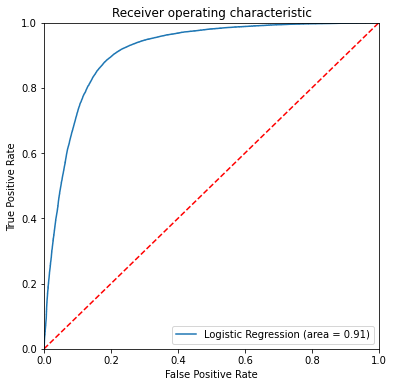

In [63]:
# ROC curve
fpr, tpr, thresholds = roc_curve(y_val, lr.predict_proba(X_val_features)[:,1])
plt.figure(figsize=(6,6))
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

> Logistic regression with SGD training

The SGDClassifier estimator in scikit-learn implements linear classifiers (SVM, logistic regression, and others) with stochastic gradient descent (SGD) training. A particular linear classifier is chosen through the loss hyperparameter. Because we want to predict the probability of charge-off, we choose logistic regression (a probabilistic classifier) by setting loss = 'log'.

In [0]:
from sklearn.linear_model import SGDClassifier
from sklearn.pipeline import Pipeline
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import GridSearchCV

#The machine learning pipeline:
pipeline_sgdlogreg = Pipeline([
    #('imputer', Imputer(copy=False)), # Mean imputation by default
    ('scaler', StandardScaler(copy=False)),
    ('model', SGDClassifier(loss='log', max_iter=1000, tol=1e-3, random_state=1, warm_start=True))
])
#A small grid of hyperparameters to search over:

param_grid_sgdlogreg = {
    'model__alpha': [10**-5, 10**-2, 10**1],
    'model__penalty': ['l1', 'l2']
}
#Create the search grid object:
grid_sgdlogreg = GridSearchCV(estimator=pipeline_sgdlogreg, param_grid=param_grid_sgdlogreg, scoring='roc_auc', n_jobs=-1, pre_dispatch='2*n_jobs', cv=5, verbose=1, return_train_score=False)


In [65]:
#Conduct the grid search and train the final model on the whole dataset:

grid_sgdlogreg.fit(X_train_features, y_train)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:  1.3min finished


GridSearchCV(cv=5, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('scaler',
                                        StandardScaler(copy=False,
                                                       with_mean=True,
                                                       with_std=True)),
                                       ('model',
                                        SGDClassifier(alpha=0.0001,
                                                      average=False,
                                                      class_weight=None,
                                                      early_stopping=False,
                                                      epsilon=0.1, eta0=0.0,
                                                      fit_intercept=True,
                                                      l1_ratio=0.15,
                                                      learning_rate='optimal',
                         

In [66]:
#Mean cross-validated AUROC score of the best model:

grid_sgdlogreg.best_score_

0.9092550225161065

In [67]:
#Best hyperparameters:

grid_sgdlogreg.best_params_

{'model__alpha': 0.01, 'model__penalty': 'l2'}

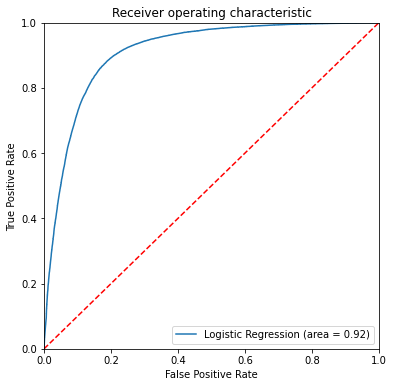

In [115]:
# ROC curve
fpr, tpr, thresholds = roc_curve(y_val, grid_sgdlogreg.predict_proba(X_val_features)[:,1])
plt.figure(figsize=(6,6))
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

Great. With Stochastic Gradient Descent, we are able to increase the AUC score by 1%. AUC with SGD logistic regression is: 92%

> 8.2 k-nearest neighbors (Very slow)

Next we try k-nearest neighbors. We need to reduce the number of variables to 10 or fewer (reference) for kNN to perform well. We'll use LDA for dimension reduction. The number of component variables to keep is a hyperparameter.

In [0]:
pipeline_knn = Pipeline([
    ('scaler', StandardScaler(copy=False)),
    ('lda', LinearDiscriminantAnalysis()),
    ('model', KNeighborsClassifier(n_jobs=-1))
])

In [0]:
param_grid_knn = {
    'lda__n_components': [3, 9], # Number of LDA components to keep
    'model__n_neighbors': [5, 25, 125] # The 'k' in k-nearest neighbors
}

In [0]:
grid_knn = GridSearchCV(estimator=pipeline_knn, param_grid=param_grid_knn, scoring='roc_auc', n_jobs=-1, pre_dispatch='2*n_jobs', cv=5, verbose=1, return_train_score=False)

In [72]:
grid_knn.fit(X_train_features, y_train)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
/usr/local/lib/python3.6/dist-packages/joblib/externals/loky/process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:  2.9min finished
/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:463: ChangedBehaviorWarning: n_components cannot be larger than min(n_features, n_classes - 1). Using min(n_features, n_classes - 1) = min(93, 2 - 1) = 1 components.
  ChangedBehaviorWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:469: FutureWarning: In version 0.23, setting n_components > min(n_features, n_classes - 1) will raise a ValueError. You should set n_components to None (default), or a value smaller or equal to min(n_features, n_classes - 1).
  warnings.warn

GridSearchCV(cv=5, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('scaler',
                                        StandardScaler(copy=False,
                                                       with_mean=True,
                                                       with_std=True)),
                                       ('lda',
                                        LinearDiscriminantAnalysis(n_components=None,
                                                                   priors=None,
                                                                   shrinkage=None,
                                                                   solver='svd',
                                                                   store_covariance=False,
                                                                   tol=0.0001)),
                                       ('model',
                                        KNeighborsClassifier(

In [73]:
#Mean cross-validated AUROC score of the best model:
grid_knn.best_score_

0.9226852429859459

In [74]:
#Best hyperparameters:
grid_knn.best_params_

{'lda__n_components': 3, 'model__n_neighbors': 5}

3 LDA components are necessary for kNN to perform better than logistic regression.

In [0]:
#K_values = [3, 5, 10, 20, 30]
 
#for K in K_values:
#    knnClassifier = KNeighborsClassifier(n_neighbors=K)
#    knnClassifier.fit(X_train, y_train)
#    val_predictions = knnClassifier.predict(X_val)
#    print("F1 Score for K:", K, "is", f1_score(y_val, val_predictions))

In [0]:
#K_values = [3, 5, 10, 20, 30]
 
#for K in K_values:
#knnClassifier = KNeighborsClassifier(n_neighbors=3)
#knnClassifier.fit(X_train, y_train)

#print("F1 Score for K=3 is", f1_score(y_val, predicted))

In [75]:
probs = grid_knn.predict_proba(X_val_features)
predicted = grid_knn.predict(X_val_features)
#print("knnClassifier on Validation: Accuracy Score: %f, F1-score: %f" % 
      #(accuracy_score(y_val, predicted), f1_score(y_val, predicted)))
accuracy = accuracy_score(y_val, predicted)
auc = metrics.roc_auc_score(y_val, probs[:, 1])

# generate evaluation metrics
print(f'AUC estimate: {auc:.3}')
print(f'Mean accuracy score: {accuracy:.3}')
print(metrics.confusion_matrix(y_val, predicted))
print(metrics.classification_report(y_val, predicted))

AUC estimate: 0.933
Mean accuracy score: 0.88
[[45255 11291]
 [ 2271 54195]]
              precision    recall  f1-score   support

           0       0.95      0.80      0.87     56546
           1       0.83      0.96      0.89     56466

    accuracy                           0.88    113012
   macro avg       0.89      0.88      0.88    113012
weighted avg       0.89      0.88      0.88    113012



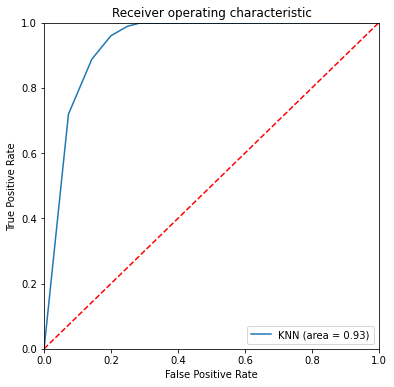

In [76]:
# ROC curve

fpr, tpr, thresholds = roc_curve(y_val, grid_knn.predict_proba(X_val_features)[:,1])
plt.figure(figsize=(6,6))
plt.plot(fpr, tpr, label='KNN (area = %0.2f)' % auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

With KNN, we are able to increase the AUC score with 1% more and the AUC with KNN is 93%.

We are getting best f1 score of 87% with K = 3 and ROC of 93% with KNN

That's great improvement from what we got from our first algorithm. But it came with a tradeoff. The amount of time taken was pretty high. 

In [0]:
#model_save_name = 'knn_Classifier.pt'
#path = F"/content/gdrive/My Drive/{model_save_name}" 
#torch.save(knnClassifier, path)

> 8.3 Decision Tree

In [82]:
%%time
param_grid={'max_depth': [5, 10, 20],
            'min_samples_leaf': [5, 10, 15],
            'min_samples_split': [2, 5, 15, 25] 
           }

dt = DecisionTreeClassifier()

grid_search = GridSearchCV(dt, # Base model
                           param_grid, # Parameters to try
                           cv = 5, # Apply 5-fold cross validation
                           verbose = 1, # Print summary
                           n_jobs = -1 # Use all available processors 
                          )

grid_search.fit(X_train_features, y_train)

Fitting 5 folds for each of 36 candidates, totalling 180 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done 180 out of 180 | elapsed: 10.6min finished


CPU times: user 4min 5s, sys: 584 ms, total: 4min 5s
Wall time: 10min 54s


#### Grid search is also time taking procedure. It took the same time as it took me to make and finish my coffee!!!

In [83]:
grid_search.best_params_ #{'max_depth': 50, 'min_samples_leaf': 5, 'min_samples_split': 5}

{'max_depth': 20, 'min_samples_leaf': 5, 'min_samples_split': 5}

> Testing: Let's see how the classifier performs val **data**. We will use the predict() function this time.

In [0]:
# Let's get the input and output data for testing the classifier
predicted = grid_search.predict(X_val_features)

We will use __Confusion matrix:__ to see the results.

__Confusion matrix:__ The diagonals show us correct classifications. Each row and column belongs to a class (default or no default). The first column and row correspond to "no default" case, the second column-rows are "default" case.




In [85]:
print(metrics.confusion_matrix(y_val, predicted))

[[47699  8847]
 [ 2968 53498]]


#### Also, look at the __classification report__ and __accuracy__.

In [86]:
print(metrics.classification_report(y_val, predicted))
print("Accuracy:", accuracy_score(y_val, predicted))

              precision    recall  f1-score   support

           0       0.94      0.84      0.89     56546
           1       0.86      0.95      0.90     56466

    accuracy                           0.90    113012
   macro avg       0.90      0.90      0.90    113012
weighted avg       0.90      0.90      0.90    113012

Accuracy: 0.8954535801507805


#### Again, a one percent increase in the f1-score from last algorithm.

However, Accuracy can be a misleading metric. We should make a class based perfomance assessment.

In [127]:
grid_search.best_estimator_

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=20, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=5,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [0]:
#model_save_name = 'Decision_tree.pt'
#path = F"/content/gdrive/My Drive/{model_save_name}" 
#torch.save(dt, path)

> Improvement Ideas:

The performance improved with this model, but there is still a lot of room for improvement. We can:
* Utilize the text fields to improve our performance (Bag of Words Representation) (done)
* Try target enconding for categorical variables (done)
* Feature selection: Not all variables may be important, we can achieve higher performance by selecting a subset of our vairables.(yet to try)
* Try ensemble models such as Random Forests (below)

> 8.4 Random forest classifier

In [0]:
#Next we train a random forest model. Note that data standardization is not necessary for a random forest.

pipeline_rfc = Pipeline([
    #('imputer', Imputer(copy=False)),
    ('model', RandomForestClassifier(n_jobs=-1, random_state=1))
])

In [0]:
#The random forest takes very long to train, so we don't test different hyperparameter choices. We'll still use GridSearchCV for the sake of consistency.

param_grid_rfc = {
    'model__n_estimators': [50] # The number of randomized trees to build
}

In [0]:
#The AUROC will always improve (with decreasing gains) as the number of estimators increases, but it's not necessarily worth the extra training time and model complexity.

grid_rfc = GridSearchCV(estimator=pipeline_rfc, param_grid=param_grid_rfc, scoring='roc_auc', n_jobs=-1, pre_dispatch='2*n_jobs', cv=5, verbose=1, return_train_score=False)

In [91]:
grid_rfc.fit(X_train_features, y_train)

Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:  2.1min finished


GridSearchCV(cv=5, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('model',
                                        RandomForestClassifier(bootstrap=True,
                                                               ccp_alpha=0.0,
                                                               class_weight=None,
                                                               criterion='gini',
                                                               max_depth=None,
                                                               max_features='auto',
                                                               max_leaf_nodes=None,
                                                               max_samples=None,
                                                               min_impurity_decrease=0.0,
                                                               min_impurity_split=None,
                                            

In [92]:
#Mean cross-validated AUROC score of the random forest:

grid_rfc.best_score_

0.9964063410675138

In [93]:
%%time
rf = RandomForestClassifier(n_estimators=50, max_depth=3, max_features='log2', oob_score=True,  random_state=0)
rf.fit(X_train_features, y_train)

CPU times: user 15.5 s, sys: 34.5 ms, total: 15.5 s
Wall time: 15.5 s


In [94]:
# generate evaluation metrics

probs = rf.predict_proba(X_val_features)
predicted = rf.predict(X_val_features)
accuracy = accuracy_score(y_val, predicted)
auc = metrics.roc_auc_score(y_val, probs[:, 1])

print(f'AUC estimate: {auc:.3}')
print(f'Out-of-bag score estimate: {rf.oob_score_:.3}')
print(f'Mean accuracy score: {accuracy:.3}')
print(metrics.confusion_matrix(y_val, predicted))
print(metrics.classification_report(y_val, predicted))

AUC estimate: 0.877
Out-of-bag score estimate: 0.816
Mean accuracy score: 0.833
[[45653 10893]
 [ 7956 48510]]
              precision    recall  f1-score   support

           0       0.85      0.81      0.83     56546
           1       0.82      0.86      0.84     56466

    accuracy                           0.83    113012
   macro avg       0.83      0.83      0.83    113012
weighted avg       0.83      0.83      0.83    113012



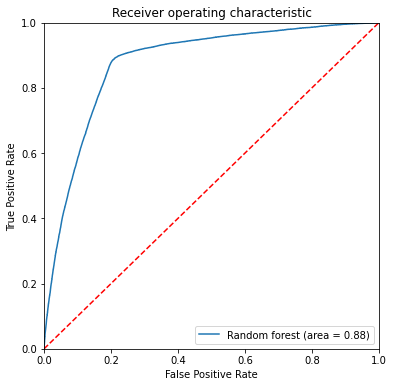

In [95]:
# ROC curve

fpr, tpr, thresholds = roc_curve(y_val, rf.predict_proba(X_val_features)[:,1])
plt.figure(figsize=(6,6))
plt.plot(fpr, tpr, label='Random forest (area = %0.2f)' % auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

In [0]:
#model_save_name = 'Random_forest.pt'
#path = F"/content/gdrive/My Drive/{model_save_name}" 
#torch.save(rf, path)

> 8.5 Neural network

In [97]:
%%time

nn = MLPClassifier(solver='lbfgs', alpha=1e-5,hidden_layer_sizes=(5, 2), random_state=1)
nn.fit(X_train_features, y_train)

CPU times: user 4.19 s, sys: 3.12 s, total: 7.31 s
Wall time: 1.95 s


In [98]:
probs = nn.predict_proba(X_val_features)
predicted = nn.predict(X_val_features)
accuracy = accuracy_score(y_val, predicted)
auc = metrics.roc_auc_score(y_val, probs[:, 1])

# generate evaluation metrics
print(f'AUC estimate: {auc:.3}')
print(f'Mean accuracy score: {accuracy:.3}')
print(metrics.confusion_matrix(y_val, predicted))
print(metrics.classification_report(y_val, predicted))

AUC estimate: 0.714
Mean accuracy score: 0.633
[[27962 28584]
 [12835 43631]]
              precision    recall  f1-score   support

           0       0.69      0.49      0.57     56546
           1       0.60      0.77      0.68     56466

    accuracy                           0.63    113012
   macro avg       0.64      0.63      0.63    113012
weighted avg       0.64      0.63      0.63    113012



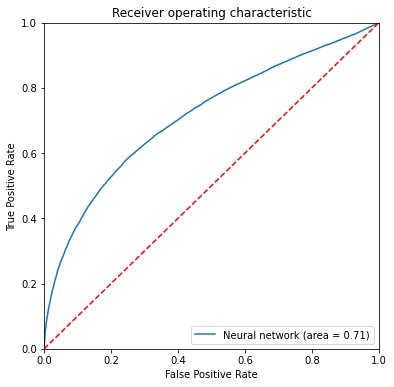

In [99]:
# ROC curve

fpr, tpr, thresholds = roc_curve(y_val, nn.predict_proba(X_val_features)[:,1])
plt.figure(figsize=(6,6))
plt.plot(fpr, tpr, label='Neural network (area = %0.2f)' % auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

In [0]:
#model_save_name = 'Neural_Network.pt'
#path = F"/content/gdrive/My Drive/{model_save_name}" 
#torch.save(nn, path)

> 8.6 Naive Bayes

In [101]:
%%time
gnb = GaussianNB()
gnb.fit(X_train_features, y_train)

CPU times: user 1.16 s, sys: 3.05 ms, total: 1.16 s
Wall time: 1.16 s


In [102]:
probs = gnb.predict_proba(X_val_features)
predicted = gnb.predict(X_val_features)
accuracy = accuracy_score(y_val, predicted)
auc = metrics.roc_auc_score(y_val, probs[:, 1])

# generate evaluation metrics
print(f'AUC estimate: {auc:.3}')
print(f'Mean accuracy score: {accuracy:.3}')
print(metrics.confusion_matrix(y_val, predicted))
print(metrics.classification_report(y_val, predicted))

AUC estimate: 0.746
Mean accuracy score: 0.628
[[25161 31385]
 [10614 45852]]
              precision    recall  f1-score   support

           0       0.70      0.44      0.55     56546
           1       0.59      0.81      0.69     56466

    accuracy                           0.63    113012
   macro avg       0.65      0.63      0.62    113012
weighted avg       0.65      0.63      0.62    113012



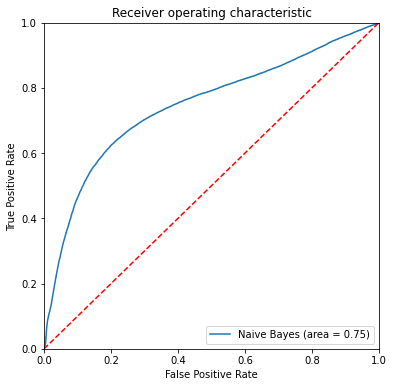

In [103]:
# ROC curve

fpr, tpr, thresholds = roc_curve(y_val, gnb.predict_proba(X_val_features)[:,1])
plt.figure(figsize=(6,6))
plt.plot(fpr, tpr, label='Naive Bayes (area = %0.2f)' % auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

### Quick but the AUC score is not good enough 

In [0]:
#model_save_name = 'NaiyeBayes.pt'
#path = F"/content/gdrive/My Drive/{model_save_name}" 
#torch.save(gnb, path)

> 8.7 Linear discriminant analysis (separate from KNN)

In [104]:
%%time
lda = LinearDiscriminantAnalysis()
lda.fit(X_train_features, y_train)

CPU times: user 14.9 s, sys: 3.59 s, total: 18.5 s
Wall time: 9.21 s


In [105]:
probs = lda.predict_proba(X_val_features)
predicted = lda.predict(X_val_features)
accuracy = accuracy_score(y_val, predicted)
auc = metrics.roc_auc_score(y_val, probs[:, 1])

# generate evaluation metrics
print(f'AUC estimate: {auc:.3}')
print(f'Mean accuracy score: {accuracy:.3}')
print(metrics.confusion_matrix(y_val, predicted))
print(metrics.classification_report(y_val, predicted))

AUC estimate: 0.906
Mean accuracy score: 0.829
[[48681  7865]
 [11475 44991]]
              precision    recall  f1-score   support

           0       0.81      0.86      0.83     56546
           1       0.85      0.80      0.82     56466

    accuracy                           0.83    113012
   macro avg       0.83      0.83      0.83    113012
weighted avg       0.83      0.83      0.83    113012



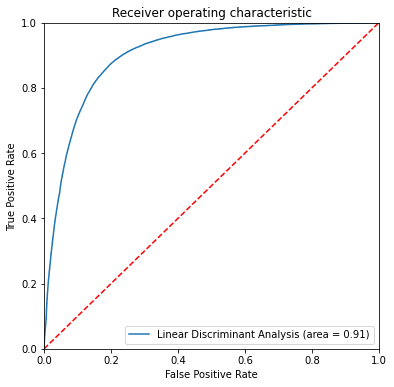

In [106]:
# ROC curve

fpr, tpr, thresholds = roc_curve(y_val, lda.predict_proba(X_val_features)[:,1])
plt.figure(figsize=(6,6))
plt.plot(fpr, tpr, label='Linear Discriminant Analysis (area = %0.2f)' % auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

Awesome. Just took 9 seconds to give great performance. 

In [0]:
#model_save_name = 'LDA.pt'
#path = F"/content/gdrive/My Drive/{model_save_name}" 
#torch.save(lda, path)

>8.8 Gradient boosting - WINNER!

Ensemble methods can be defined as combining several different models (base learners) into final model (meta learner) to reduce the generalization error. 

It relies on the assumption that each model would look at a different aspect of the data which yield to capturing part of the truth. Combining good performing models the were trained independently will capture more of the truth than a single model. Therefore, this would result in more accurate predictions and lower generalization errors.

In [109]:
%%time
gradboost = GradientBoostingClassifier(n_estimators=200,max_depth=3)
gradboost.fit(X_train_features, y_train)

CPU times: user 13min 29s, sys: 166 ms, total: 13min 30s
Wall time: 13min 30s


In [110]:
probs = gradboost.predict_proba(X_val_features)
predicted = gradboost.predict(X_val_features)
accuracy = accuracy_score(y_val, predicted)
auc = metrics.roc_auc_score(y_val, probs[:, 1])

# generate evaluation metrics
print(f'AUC estimate: {auc:.3}')
print(f'Mean accuracy score: {accuracy:.3}')
print(metrics.confusion_matrix(y_val, predicted))
print(metrics.classification_report(y_val, predicted))

AUC estimate: 0.924
Mean accuracy score: 0.856
[[46419 10127]
 [ 6137 50329]]
              precision    recall  f1-score   support

           0       0.88      0.82      0.85     56546
           1       0.83      0.89      0.86     56466

    accuracy                           0.86    113012
   macro avg       0.86      0.86      0.86    113012
weighted avg       0.86      0.86      0.86    113012



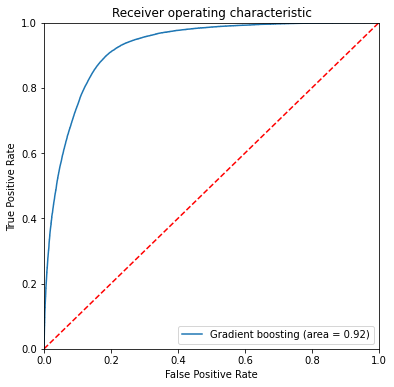

In [111]:
# ROC curve

fpr, tpr, thresholds = roc_curve(y_val, gradboost.predict_proba(X_val_features)[:,1])
plt.figure(figsize=(6,6))
plt.plot(fpr, tpr, label='Gradient boosting (area = %0.2f)' % auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

In [150]:
gradboost.feature_importances_

array([0.00000000e+00, 1.01693411e-05, 0.00000000e+00, 0.00000000e+00,
       1.01989970e-05, 4.16792635e-05, 2.36115841e-05, 0.00000000e+00,
       0.00000000e+00, 4.09850425e-06, 0.00000000e+00, 6.03853416e-05,
       1.29521825e-05, 2.42820748e-05, 1.27194983e-04, 8.83843411e-05,
       0.00000000e+00, 1.08040669e-05, 1.29548706e-05, 1.07908549e-05,
       0.00000000e+00, 0.00000000e+00, 1.73489013e-05, 2.08641865e-05,
       0.00000000e+00, 0.00000000e+00, 2.06705077e-05, 2.43351745e-05,
       0.00000000e+00, 4.10181731e-05, 0.00000000e+00, 0.00000000e+00,
       5.69272452e-06, 1.39374518e-05, 0.00000000e+00, 1.63811635e-04,
       2.85069535e-05, 0.00000000e+00, 2.56565572e-05, 0.00000000e+00,
       0.00000000e+00, 7.48925097e-05, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 3.78793095e-05, 0.00000000e+00,
       0.00000000e+00, 1.48270808e-05, 7.94787367e-03, 2.71700939e-03,
       2.95767447e-03, 3.79831137e-03, 2.32853943e-03, 1.77961451e-04,
      

> Bagging Classifier : Too Slow

In [0]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

In [0]:
clf=BaggingClassifier(oob_score=True,n_jobs=-1,n_estimators=20,random_state=400,
                      base_estimator=DecisionTreeClassifier())

In [166]:
clf.fit(X_train_features,y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/_bagging.py:633: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/_bagging.py:638: RuntimeWarning: invalid value encountered in true_divide
  predictions.sum(axis=1)[:, np.newaxis])


BaggingClassifier(base_estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                        class_weight=None,
                                                        criterion='gini',
                                                        max_depth=None,
                                                        max_features=None,
                                                        max_leaf_nodes=None,
                                                        min_impurity_decrease=0.0,
                                                        min_impurity_split=None,
                                                        min_samples_leaf=1,
                                                        min_samples_split=2,
                                                        min_weight_fraction_leaf=0.0,
                                                        presort='deprecated',
                                                        random_state=None,


In [160]:
clf.oob_score_

0.9533454559934166

In [161]:
clf.score(X_val_features,y_val)

0.9593582982338159

In [0]:
#for w in range(10,300,20):
#    clf=BaggingClassifier(oob_score=True,n_jobs=-1,n_estimators=w,random_state=400,
#                          base_estimator=DecisionTreeClassifier())
#    clf.fit(X_train_features,y_train)
##    oob=clf.oob_score_
 #   print('For n_estimators = '+str(w))
#    print('OOB score is '+str(oob))
#    print('************************')

In [168]:
# Feature Importance
clf.estimators_

[DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                        max_depth=None, max_features=None, max_leaf_nodes=None,
                        min_impurity_decrease=0.0, min_impurity_split=None,
                        min_samples_leaf=1, min_samples_split=2,
                        min_weight_fraction_leaf=0.0, presort='deprecated',
                        random_state=1859118377, splitter='best'),
 DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                        max_depth=None, max_features=None, max_leaf_nodes=None,
                        min_impurity_decrease=0.0, min_impurity_split=None,
                        min_samples_leaf=1, min_samples_split=2,
                        min_weight_fraction_leaf=0.0, presort='deprecated',
                        random_state=1559503733, splitter='best'),
 DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                        max_depth=None, max_

In [169]:
print(clf.estimators_[0]) #first tree model

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=1859118377, splitter='best')


In [170]:
print(clf.estimators_[0].feature_importances_)

[9.04478953e-04 1.16153069e-03 1.19479536e-03 8.93348140e-04
 1.56489420e-03 7.54032183e-04 1.10631087e-03 1.09023991e-03
 1.09263591e-03 1.66585710e-03 1.13254399e-03 1.07551645e-03
 1.03367368e-03 7.82354305e-04 1.21878391e-03 1.10087891e-03
 1.55008047e-03 1.77969959e-03 1.04438608e-03 7.75783157e-04
 1.51054959e-03 6.20115676e-04 9.59907311e-04 9.31599758e-04
 6.90309977e-04 1.06729088e-03 6.50086386e-04 6.71399477e-04
 7.57040426e-04 1.31605105e-03 9.48824832e-04 9.49711431e-04
 9.00272343e-04 5.41999384e-04 1.15940116e-03 1.38388581e-03
 9.81872386e-04 6.66306893e-04 1.74786009e-03 1.39513634e-03
 7.54452874e-04 8.31981354e-04 7.15169960e-04 8.72398796e-04
 9.86827708e-04 9.70225095e-04 9.51432038e-04 7.46996263e-04
 8.30929073e-04 9.16309873e-04 1.74472117e-02 2.93981054e-02
 1.22488831e-02 2.87577760e-02 3.23718278e-02 5.19412751e-03
 8.58467885e-03 1.58422707e-02 2.47085887e-03 2.64655716e-02
 2.48537236e-02 2.37859931e-02 2.95037163e-04 5.96612009e-03
 2.31415594e-02 4.911381

In [171]:
# We can extract feature importance from each tree then take a mean for all trees
import numpy as np
imp=[]
for i in clf.estimators_:
    imp.append(i.feature_importances_)
imp=np.mean(imp,axis=0)
imp

array([1.10267856e-03, 1.01344469e-03, 1.13598587e-03, 1.07828634e-03,
       1.21557109e-03, 1.14181947e-03, 1.12170120e-03, 1.20914590e-03,
       1.13849373e-03, 1.36186001e-03, 1.26754728e-03, 1.40984352e-03,
       1.12661234e-03, 1.05134629e-03, 1.26358032e-03, 9.96085704e-04,
       9.95308137e-04, 1.35006522e-03, 1.02098516e-03, 8.84327245e-04,
       1.31439592e-03, 7.73941619e-04, 1.04883902e-03, 1.02491611e-03,
       9.18100208e-04, 1.01256154e-03, 9.21845424e-04, 7.74854081e-04,
       8.37863823e-04, 1.37856972e-03, 8.83246605e-04, 9.15950226e-04,
       9.04512629e-04, 7.56160552e-04, 9.75823097e-04, 1.21919837e-03,
       1.10965971e-03, 8.26658010e-04, 1.23510936e-03, 1.02733857e-03,
       7.33704809e-04, 9.76765170e-04, 6.83865324e-04, 8.96016726e-04,
       8.41310500e-04, 9.44128046e-04, 1.00049225e-03, 7.91064128e-04,
       9.46158543e-04, 1.01685798e-03, 1.63667165e-02, 2.89364128e-02,
       1.25336687e-02, 2.77804607e-02, 3.16990413e-02, 5.06702343e-03,
      

In [0]:
feature_importance=pd.Series(imp,index=X_train_features.tolist())

In [0]:
feature_importance.sort_values(ascending=False)

In [0]:
feature_importance.sort_values(ascending=False).plot(kind='bar')

In [0]:
#model_save_name = 'gradient_boosting.pt'
#path = F"/content/gdrive/My Drive/{model_save_name}" 
#torch.save(gradboost, path)

In [0]:
#!pip install mxnet

     |████████████████████████████████| 68.7MB 61kB/s 
  Found existing installation: graphviz 0.10.1
    Uninstalling graphviz-0.10.1:
      Successfully uninstalled graphviz-0.10.1


> 8.9 SVM (Support Vector Machines) 

The code is in comments below but not running it as it it taking hours and even then no results. 

In [0]:
#svm = SVC(kernel='linear', C=1E10)
#svm.fit(X_train, y_train)

In [0]:
#probs = svm.predict_proba(X_val)
#predicted = svm.predict(X_val)
#accuracy = accuracy_score(y_val, predicted)
#auc = metrics.roc_auc_score(y_val, probs[:, 1])

# generate evaluation metrics
#print(f'AUC estimate: {auc:.3}')
#print(f'Mean accuracy score: {accuracy:.3}')
#print(metrics.confusion_matrix(y_val, predicted))
#print(metrics.classification_report(y_val, predicted))

In [117]:
from keras.models import Sequential
from keras.layers import Dense
np.random.seed(777)

Using TensorFlow backend.


In [118]:
X_train_features.shape

(452046, 93)

> 8. 10 Multi Layer ANN - Keras

Reference: https://machinelearningmastery.com/tutorial-first-neural-network-python-keras/

In [120]:
# create model
model = Sequential()
model.add(Dense(12, input_dim=93, activation='relu'))
model.add(Dense(93, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
# Compile model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
# Fit the model
model.fit(X_train_features, y_train, epochs=5, batch_size=10)
# evaluate the model
scores = model.evaluate(X_val_features, y_val)
print("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

predictions = model.predict(X_val_features)
y_rounded = [round(x[0]) for x in predictions]
scores_test = model.evaluate(X_val_features, y_val)
print("\n%s: %.2f%%" % (model.metrics_names[1], scores_test[1]*100))

accuracy_score(y_val, y_rounded)

Epoch 1/5
452046/452046 [==============================] - 49s 107us/step - loss: 0.3682 - accuracy: 0.8455
Epoch 2/5
452046/452046 [==============================] - 48s 106us/step - loss: 0.3552 - accuracy: 0.8523
Epoch 3/5
452046/452046 [==============================] - 48s 106us/step - loss: 0.3525 - accuracy: 0.8535
Epoch 4/5
452046/452046 [==============================] - 48s 107us/step - loss: 0.3512 - accuracy: 0.8542
Epoch 5/5
113012/113012 [==============================] - 2s 15us/step

accuracy: 85.53%
113012/113012 [==============================] - 1s 13us/step

accuracy: 85.53%


0.8552808551304286

> 8. 11 Single Layer ANN

In [0]:
# Phase 2: Making the Neural Network (NN)

# Importing the Keras libraries and packages
import keras
from keras.models import Sequential # sequential module reqd to initialize the NN
from keras.layers import Dense # dense module reqd to build the layers of the NN

In [0]:
# Initialising the ANN
loans_predictor = Sequential() 
# creating object of Sequential class

In [0]:
# Adding the input layer and the hidden layer
loans_predictor.add(Dense(input_dim=93, activation="relu", kernel_initializer="uniform", units=5))

In [0]:
# Adding the output layer
loans_predictor.add(Dense(activation = 'sigmoid', kernel_initializer = "uniform", units = 1))

In [0]:
# Compiling the ANN
loans_predictor.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [139]:
# Fitting the ANN to the Training set
loans_predictor.fit(X_train_features, y_train, batch_size = 10, nb_epoch = 10)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """Entry point for launching an IPython kernel.


Epoch 1/10
452046/452046 [==============================] - 44s 98us/step - loss: 0.3714 - accuracy: 0.8455
Epoch 2/10
452046/452046 [==============================] - 43s 96us/step - loss: 0.3634 - accuracy: 0.8492
Epoch 3/10
452046/452046 [==============================] - 45s 99us/step - loss: 0.3623 - accuracy: 0.8499
Epoch 4/10
452046/452046 [==============================] - 43s 96us/step - loss: 0.3616 - accuracy: 0.8502
Epoch 5/10
452046/452046 [==============================] - 44s 96us/step - loss: 0.3610 - accuracy: 0.8503
Epoch 6/10
452046/452046 [==============================] - 43s 96us/step - loss: 0.3608 - accuracy: 0.8506
Epoch 7/10
452046/452046 [==============================] - 44s 98us/step - loss: 0.3605 - accuracy: 0.8508
Epoch 8/10
452046/452046 [==============================] - 43s 96us/step - loss: 0.3603 - accuracy: 0.8506
Epoch 9/10
452046/452046 [==============================] - 44s 96us/step - loss: 0.3601 - accuracy: 0.8506
Epoch 10/10
452046/452046 [=

In [0]:
# Making the predictions and evaluating the model

# Predicting the Test set results
y_pred = loans_predictor.predict(X_val_features)

In [0]:
y_pred = (y_pred > 0.5)

In [142]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_val, y_pred)

cm

array([[46515, 10031],
       [ 6678, 49788]])